# **Importing Libraries and Settings**

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Configure visual settings
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['figure.dpi'] = 250
sns.set_theme(style='darkgrid', palette='viridis')

# Suppress warnings
warnings.filterwarnings('ignore')

# %matplotlib inline is not required in Google Colab


# **Load and Inspect Data**

In [2]:
# Load the anime dataset
df = pd.read_csv('/content/anime.csv')

# Preview the first 5 rows
print("Preview of dataset:")
display(df.head())

# Display dataset structure and non-null info
print("\nDataset Information:")
df.info()

# View unique values in 'episodes' column
print("\nUnique values in 'episodes' column:")
print(df['episodes'].unique())


Preview of dataset:


,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB

Unique values in 'episodes' column:
['1' '64' '51' '24' '10' '148' '110' '13' '201' '25' '22' '75' '4' '26'
 '12' '27' '43' '74' '37' '2' '11' '99' 'Unknown' '39' '101' '47' '50'
 '62' '33' '112' '23' '3' '94' '6' '8' '14' '7' '40' '15' '203' '77' '291'
 '120' '102' '96' '38' '79' '175' '103' '70' '153' '45' '5' '21' '63' '52'
 '28' '145' '36' '69' '60' '178' '114' '35' '61' '34' '109' '20' '9' '49'
 '366' '97' '48' '78' '358' '155' '104' '113' '54' 

# **Data Cleaning**

In [3]:
# Replace 'Unknown' in 'episodes' column with NaN
df['episodes'].replace('Unknown', None, inplace=True)

# Check unique values after cleaning
print("Unique values in 'episodes' after replacing 'Unknown':")
print(df['episodes'].unique())

# Convert 'episodes' column to numeric type
df['episodes'] = pd.to_numeric(df['episodes'])

# Show updated data types and missing values
print("\nDataset info after converting 'episodes' to numeric:")
df.info()


Unique values in 'episodes' after replacing 'Unknown':
['1' '64' '51' '24' '10' '148' '110' '13' '201' '25' '22' '75' '4' '26'
 '12' '27' '43' '74' '37' '2' '11' '99' None '39' '101' '47' '50' '62'
 '33' '112' '23' '3' '94' '6' '8' '14' '7' '40' '15' '203' '77' '291'
 '120' '102' '96' '38' '79' '175' '103' '70' '153' '45' '5' '21' '63' '52'
 '28' '145' '36' '69' '60' '178' '114' '35' '61' '34' '109' '20' '9' '49'
 '366' '97' '48' '78' '358' '155' '104' '113' '54' '167' '161' '42' '142'
 '31' '373' '220' '46' '195' '17' '1787' '73' '147' '127' '16' '19' '98'
 '150' '76' '53' '124' '29' '115' '224' '44' '58' '93' '154' '92' '67'
 '172' '86' '30' '276' '59' '72' '330' '41' '105' '128' '137' '56' '55'
 '65' '243' '193' '18' '191' '180' '91' '192' '66' '182' '32' '164' '100'
 '296' '694' '95' '68' '117' '151' '130' '87' '170' '119' '84' '108' '156'
 '140' '331' '305' '300' '510' '200' '88' '1471' '526' '143' '726' '136'
 '1818' '237' '1428' '365' '163' '283' '71' '260' '199' '225' '312' '24

# **Exploratory Data Analysis (EDA)**

Basic Statistics of Numeric Columns:


,anime_id,episodes,rating,members
count,12294.000000,11954.000000,12064.000000,1.229400e+04
mean,14058.221653,12.382550,6.473902,1.807134e+04
std,11455.294701,46.865352,1.026746,5.482068e+04
min,1.000000,1.000000,1.670000,5.000000e+00
25%,3484.250000,1.000000,5.880000,2.250000e+02
50%,10260.500000,2.000000,6.570000,1.550000e+03
75%,24794.500000,12.000000,7.180000,9.437000e+03
max,34527.000000,1818.000000,10.000000,1.013917e+06


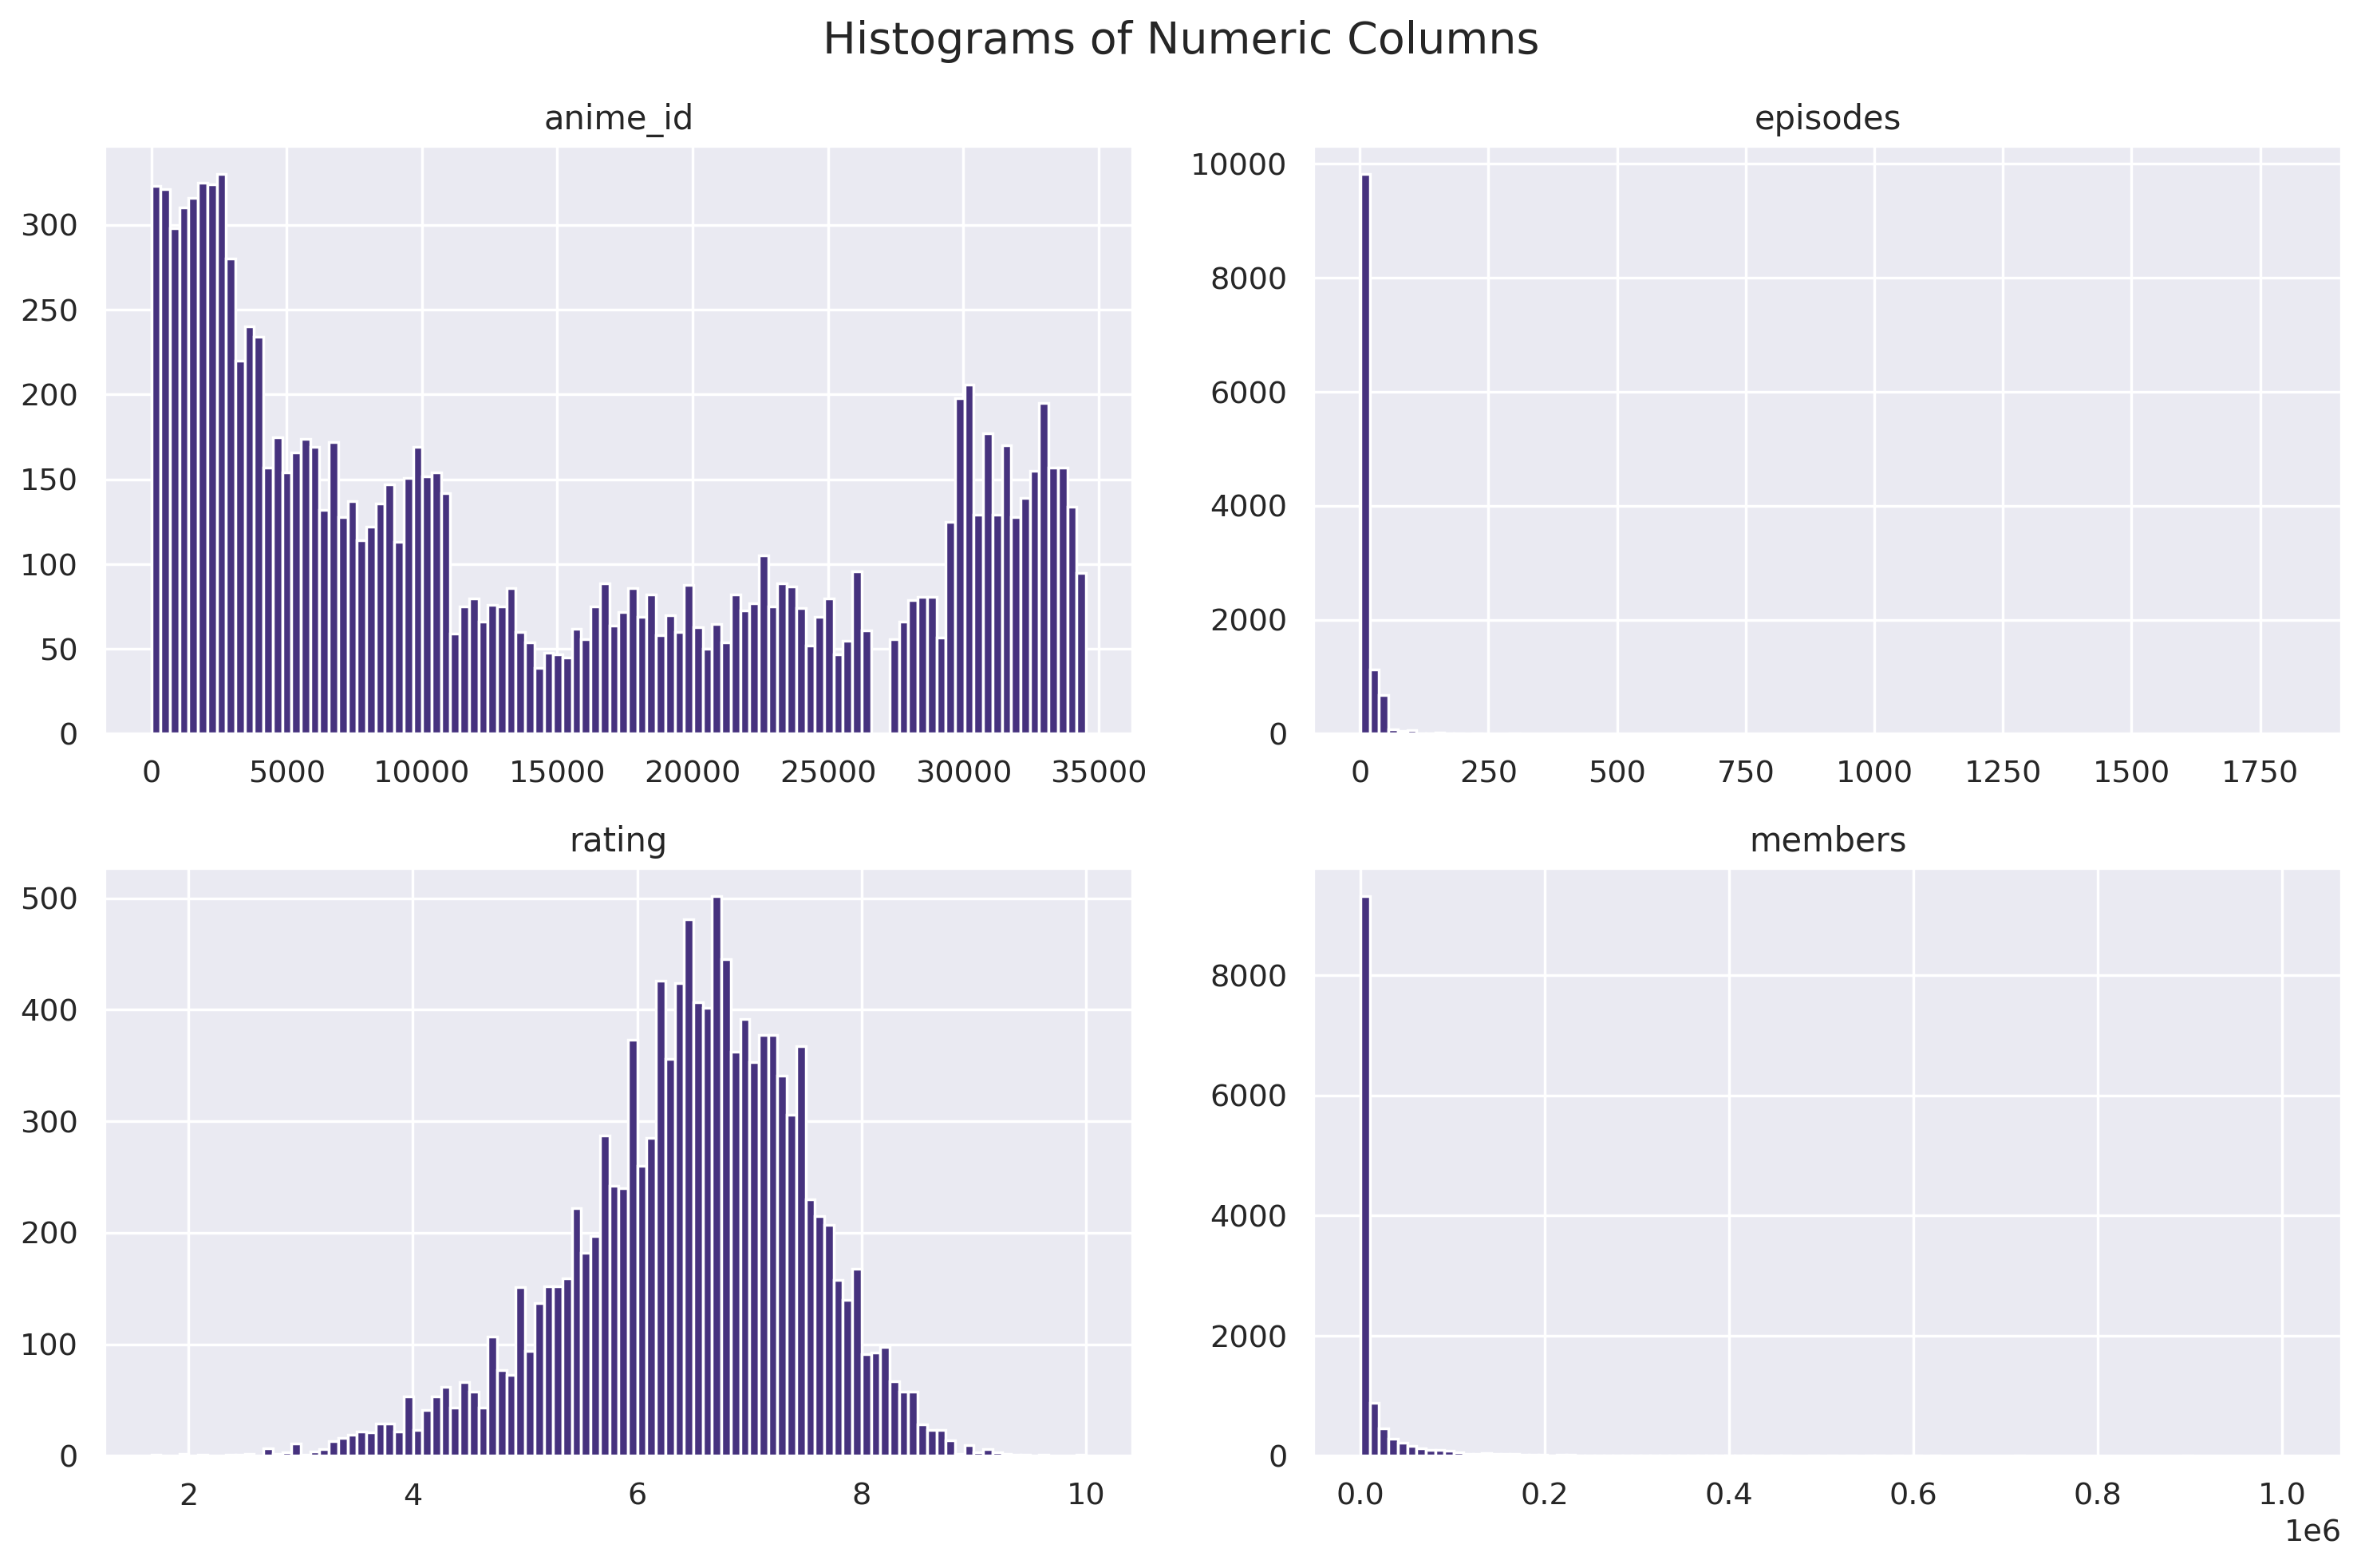

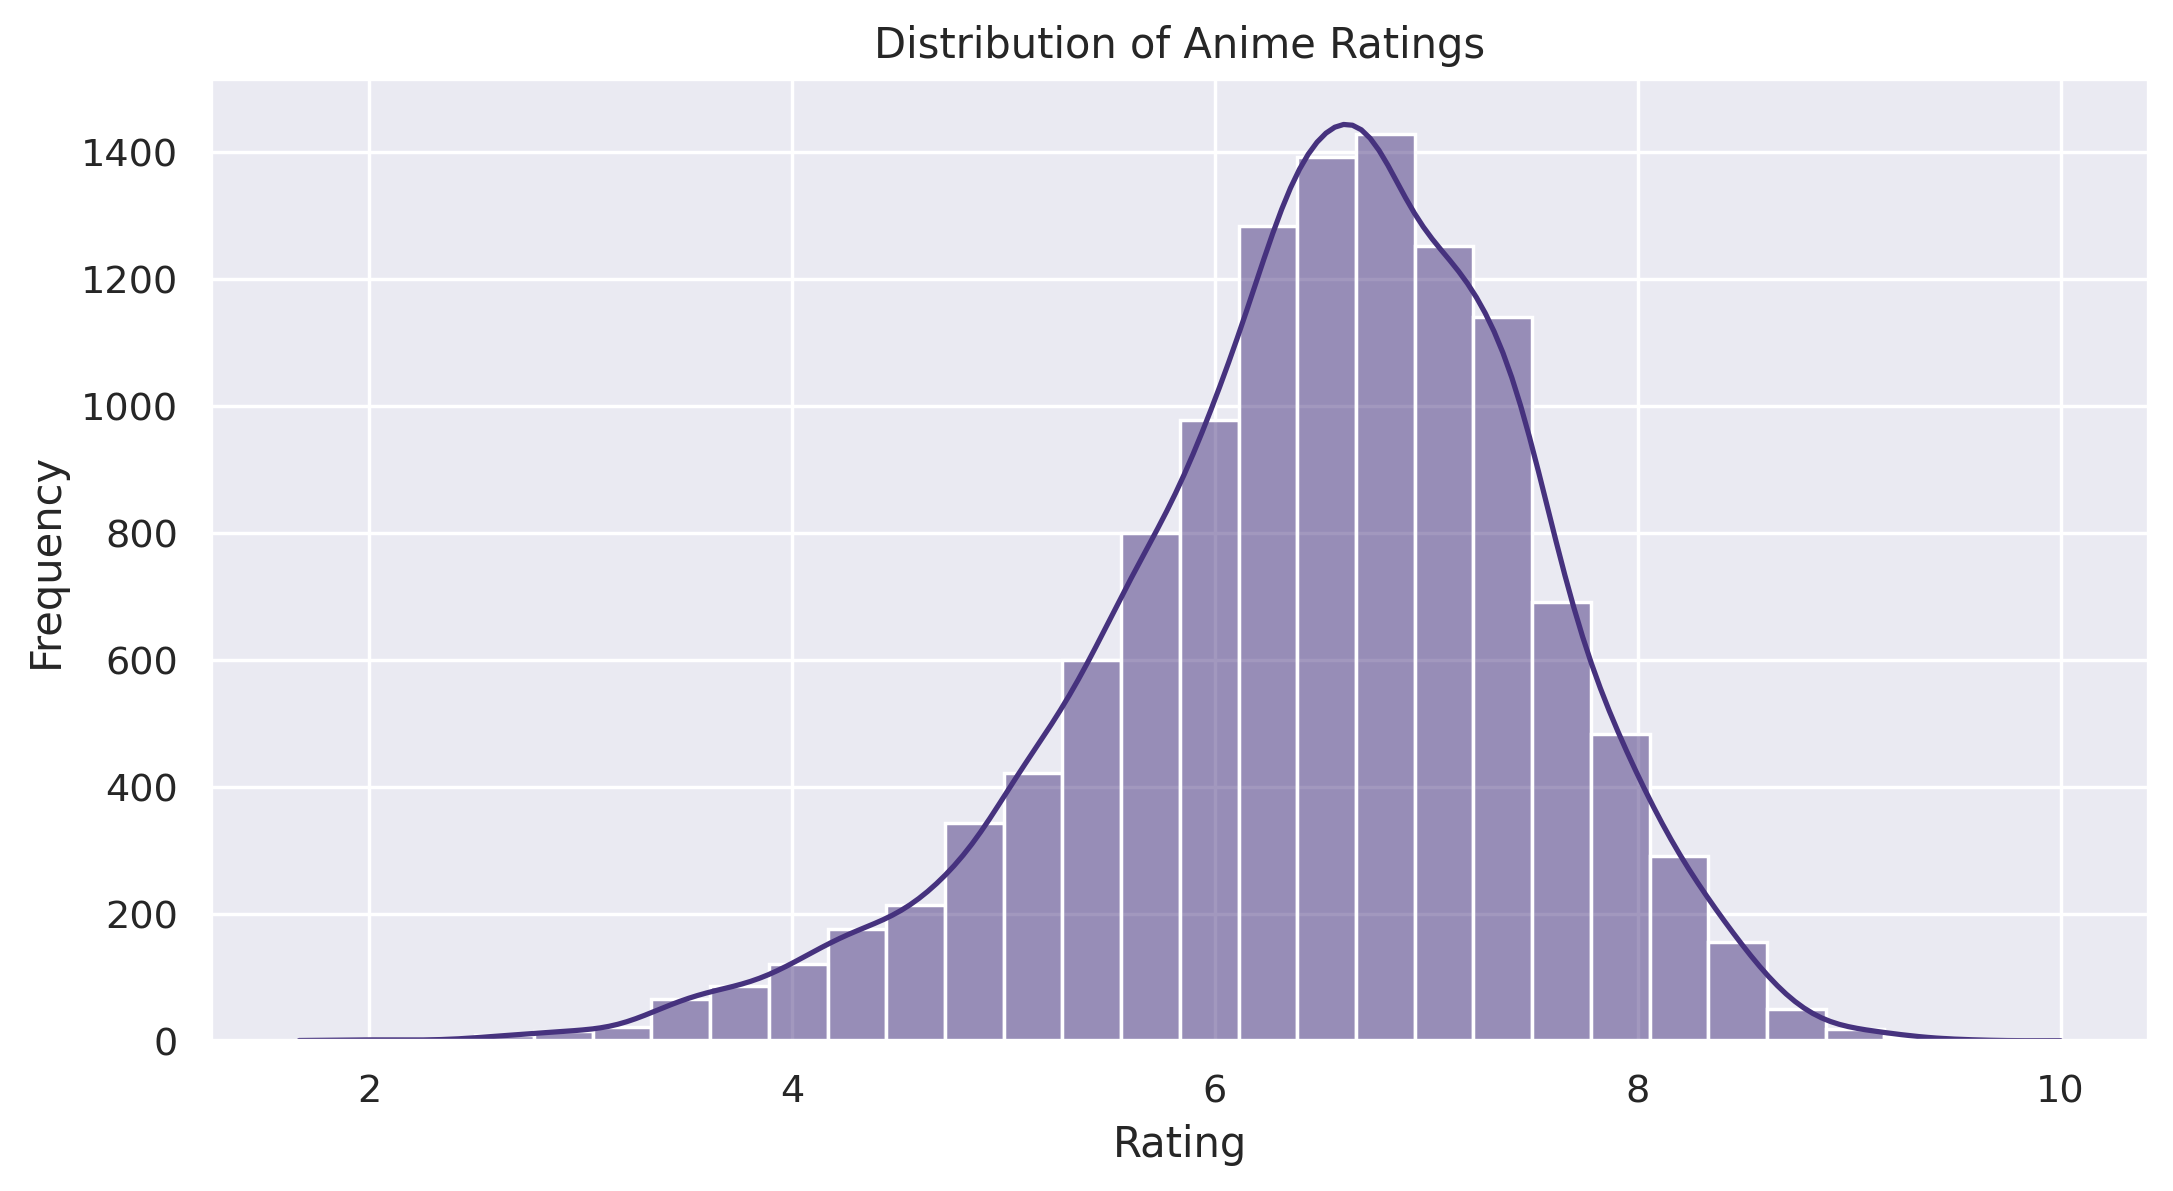

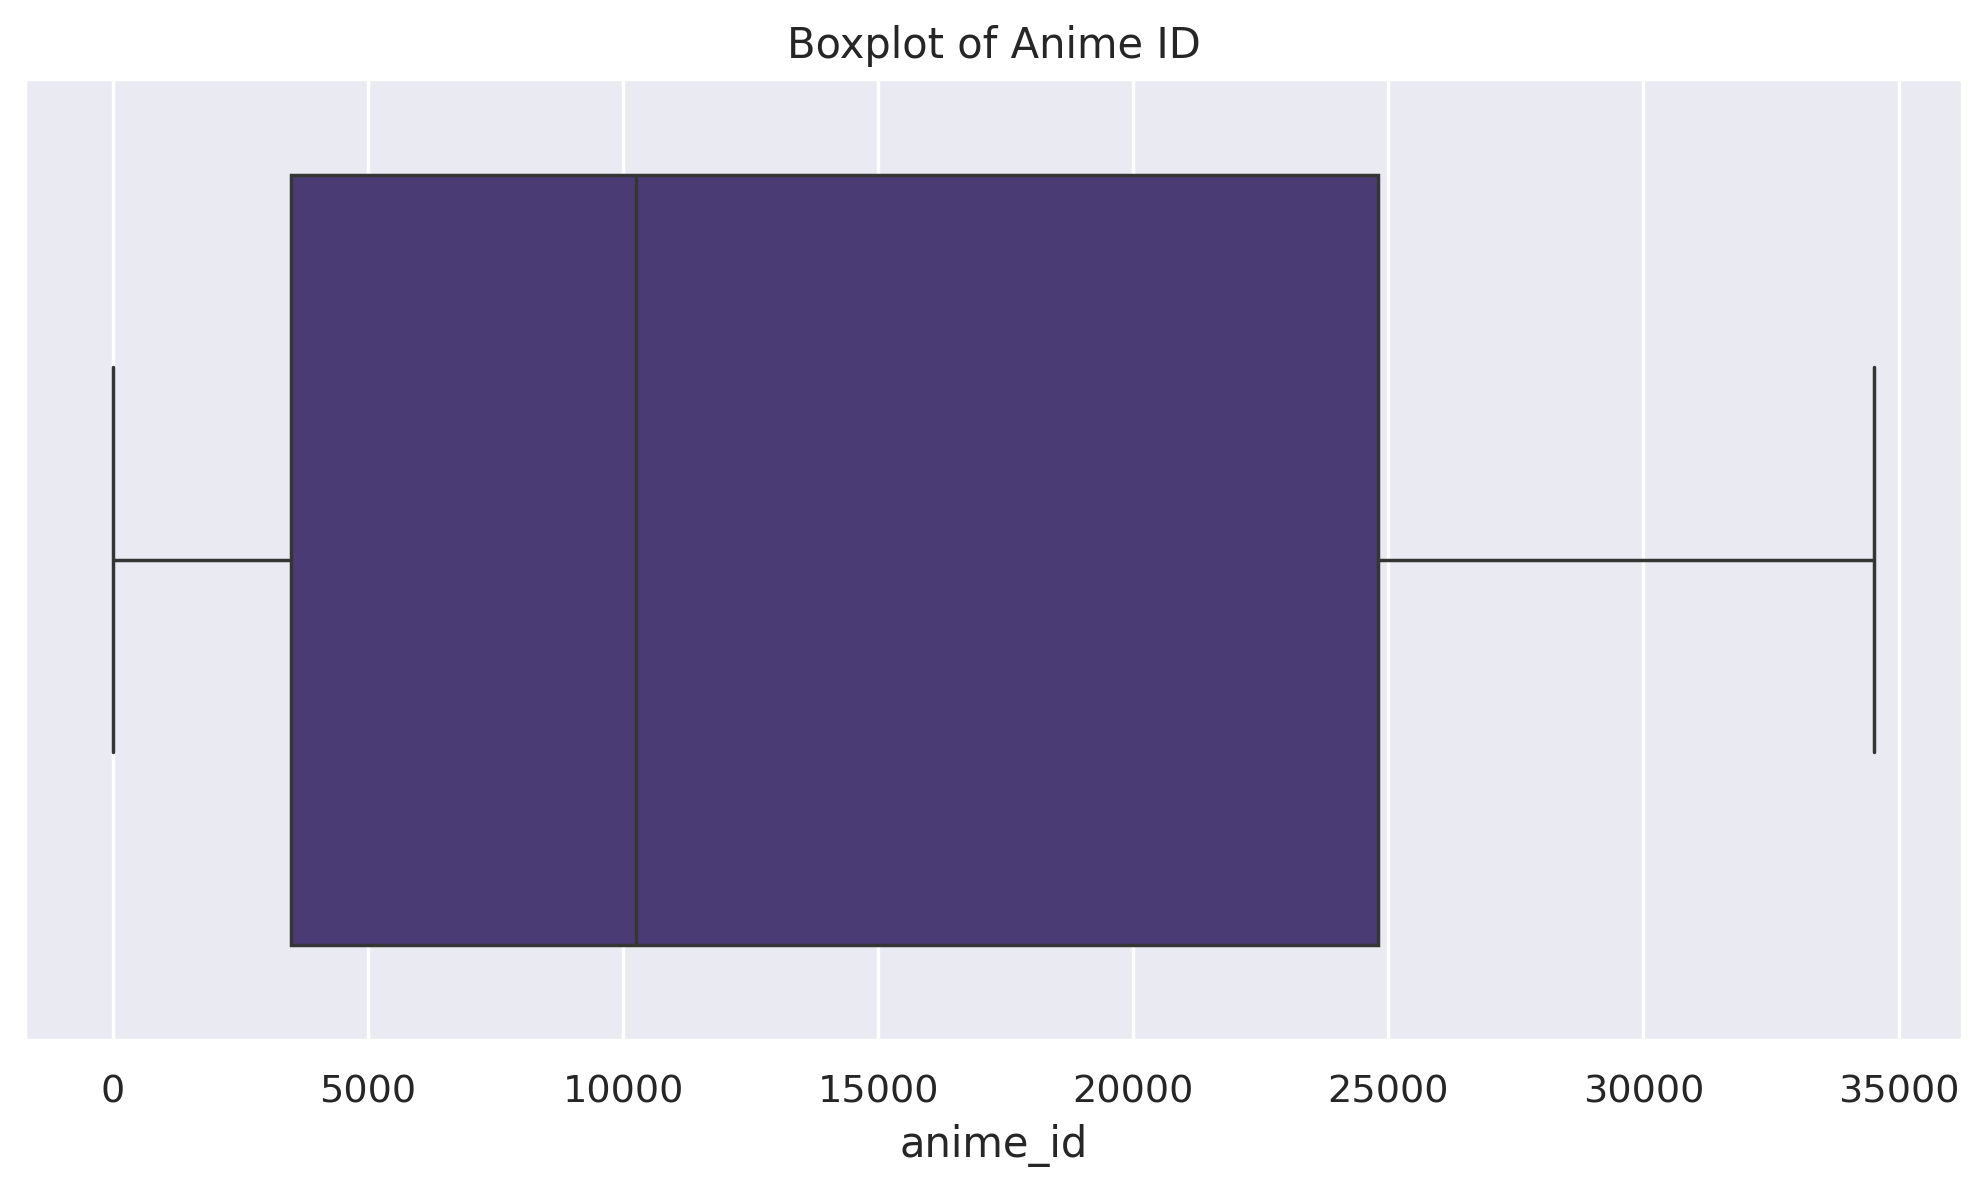

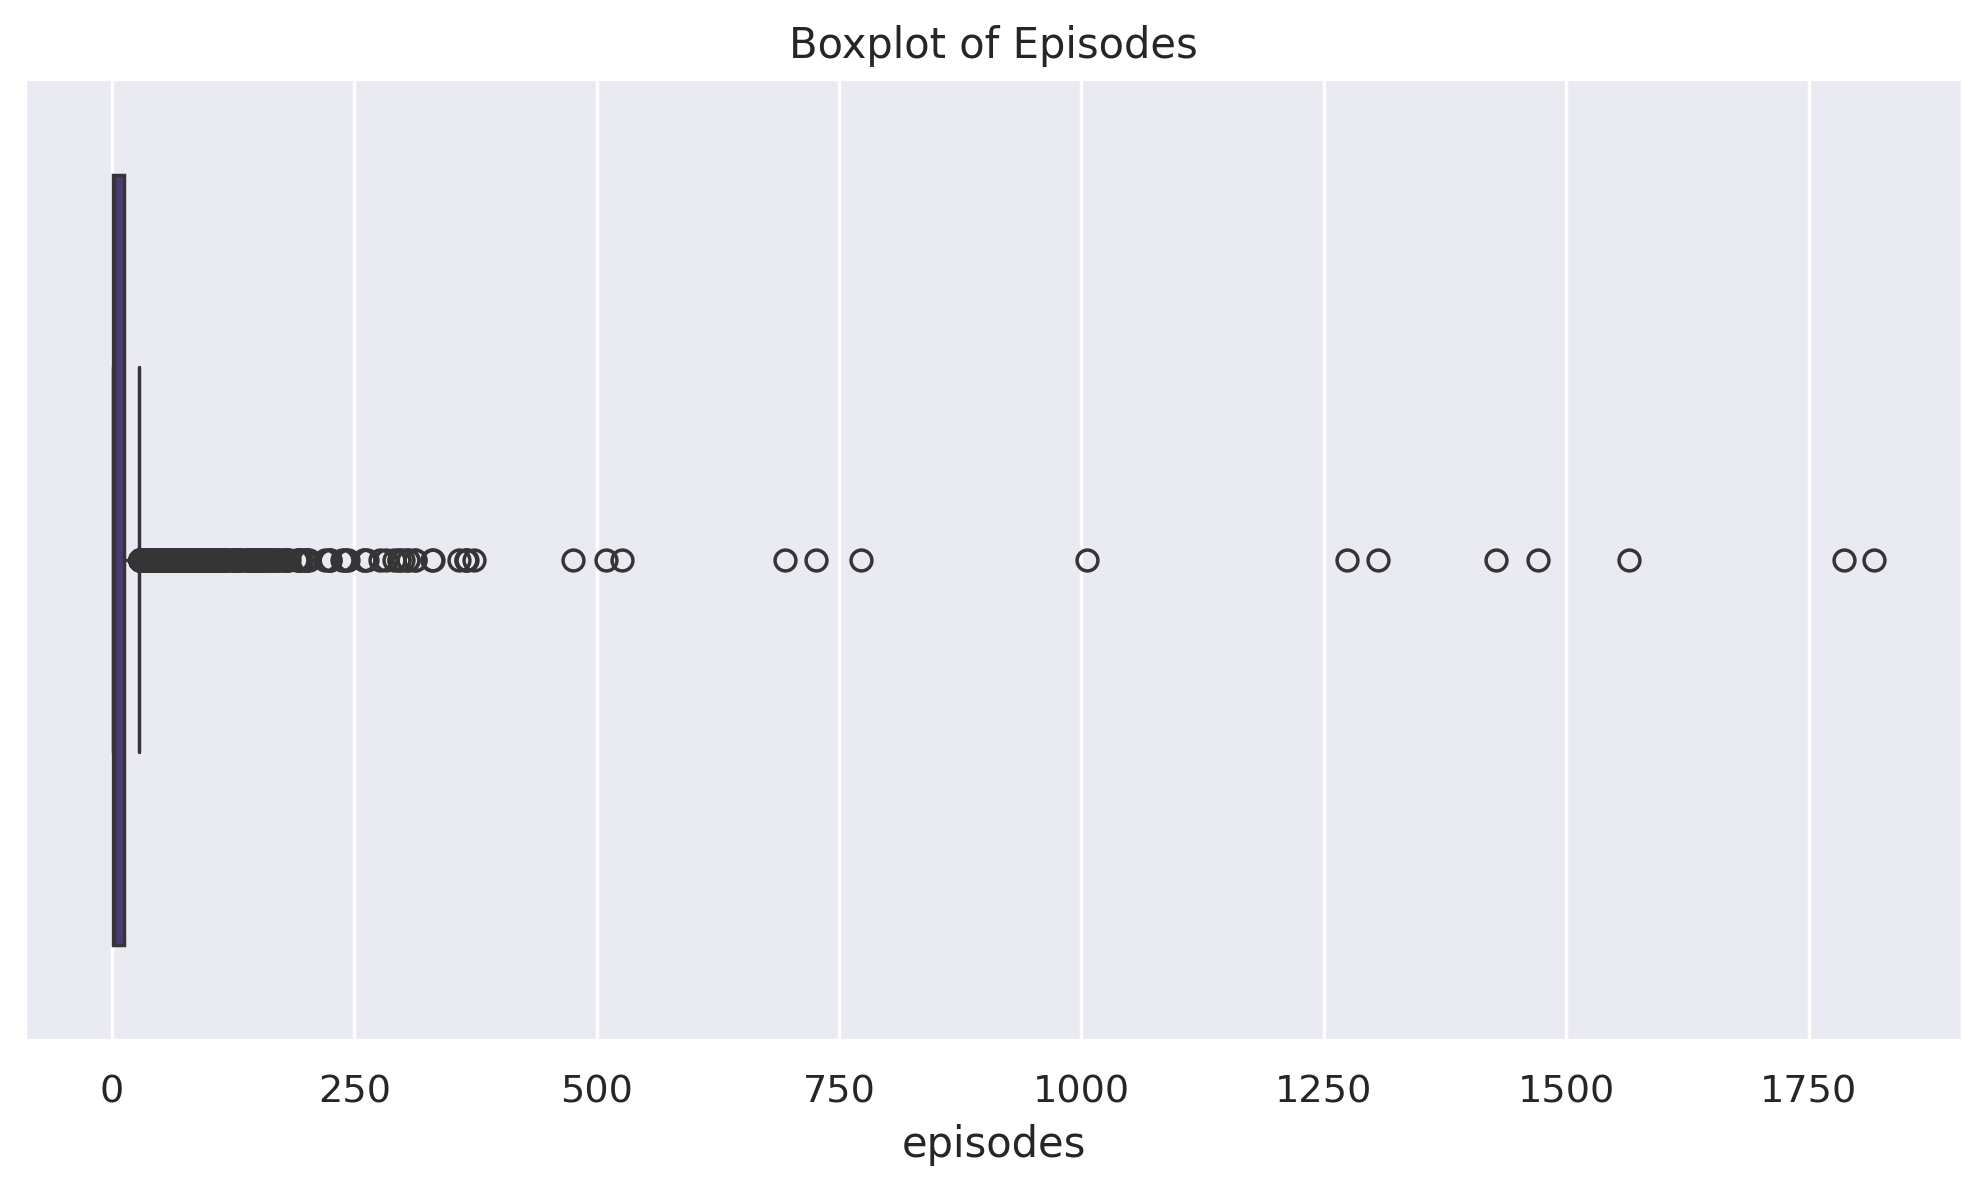

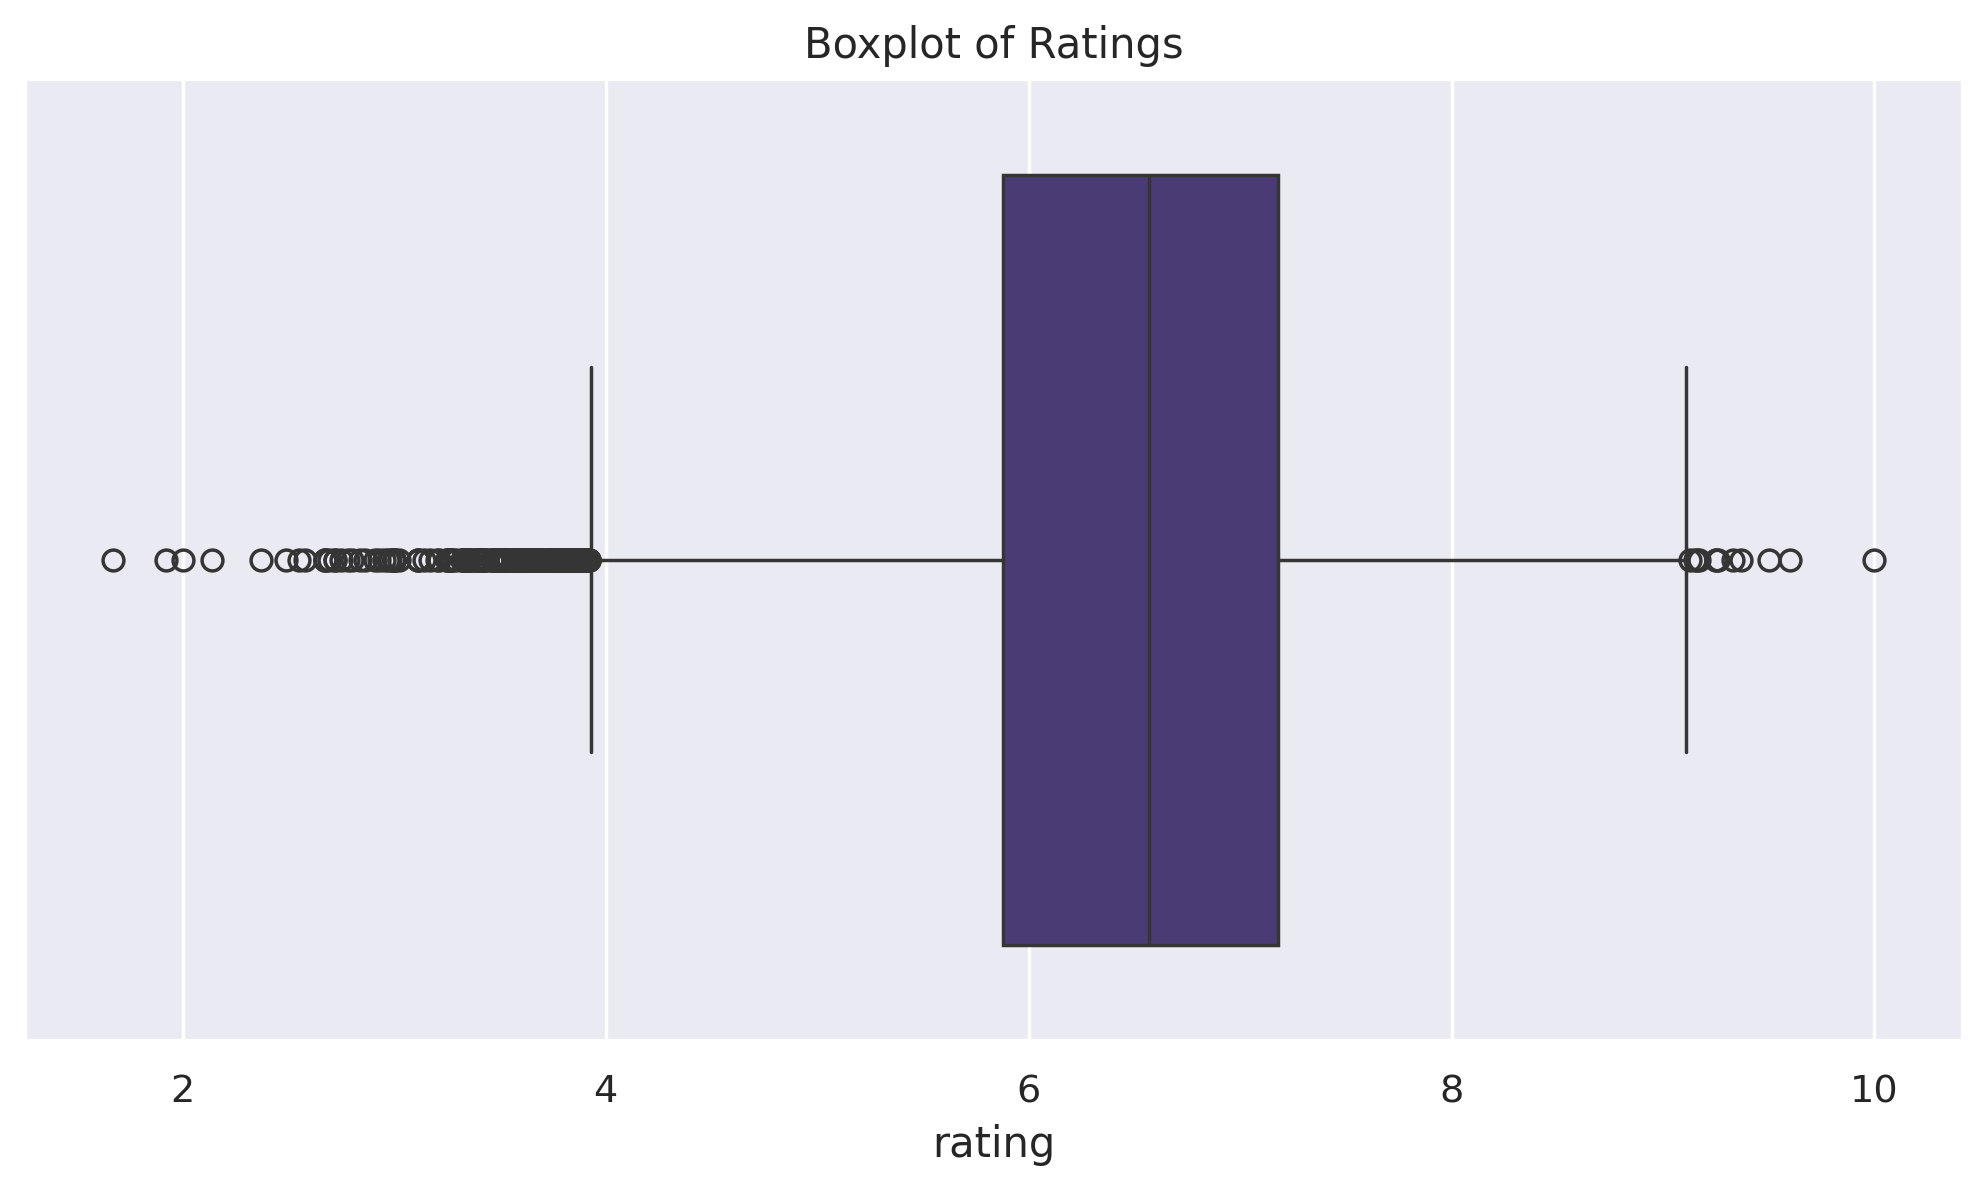

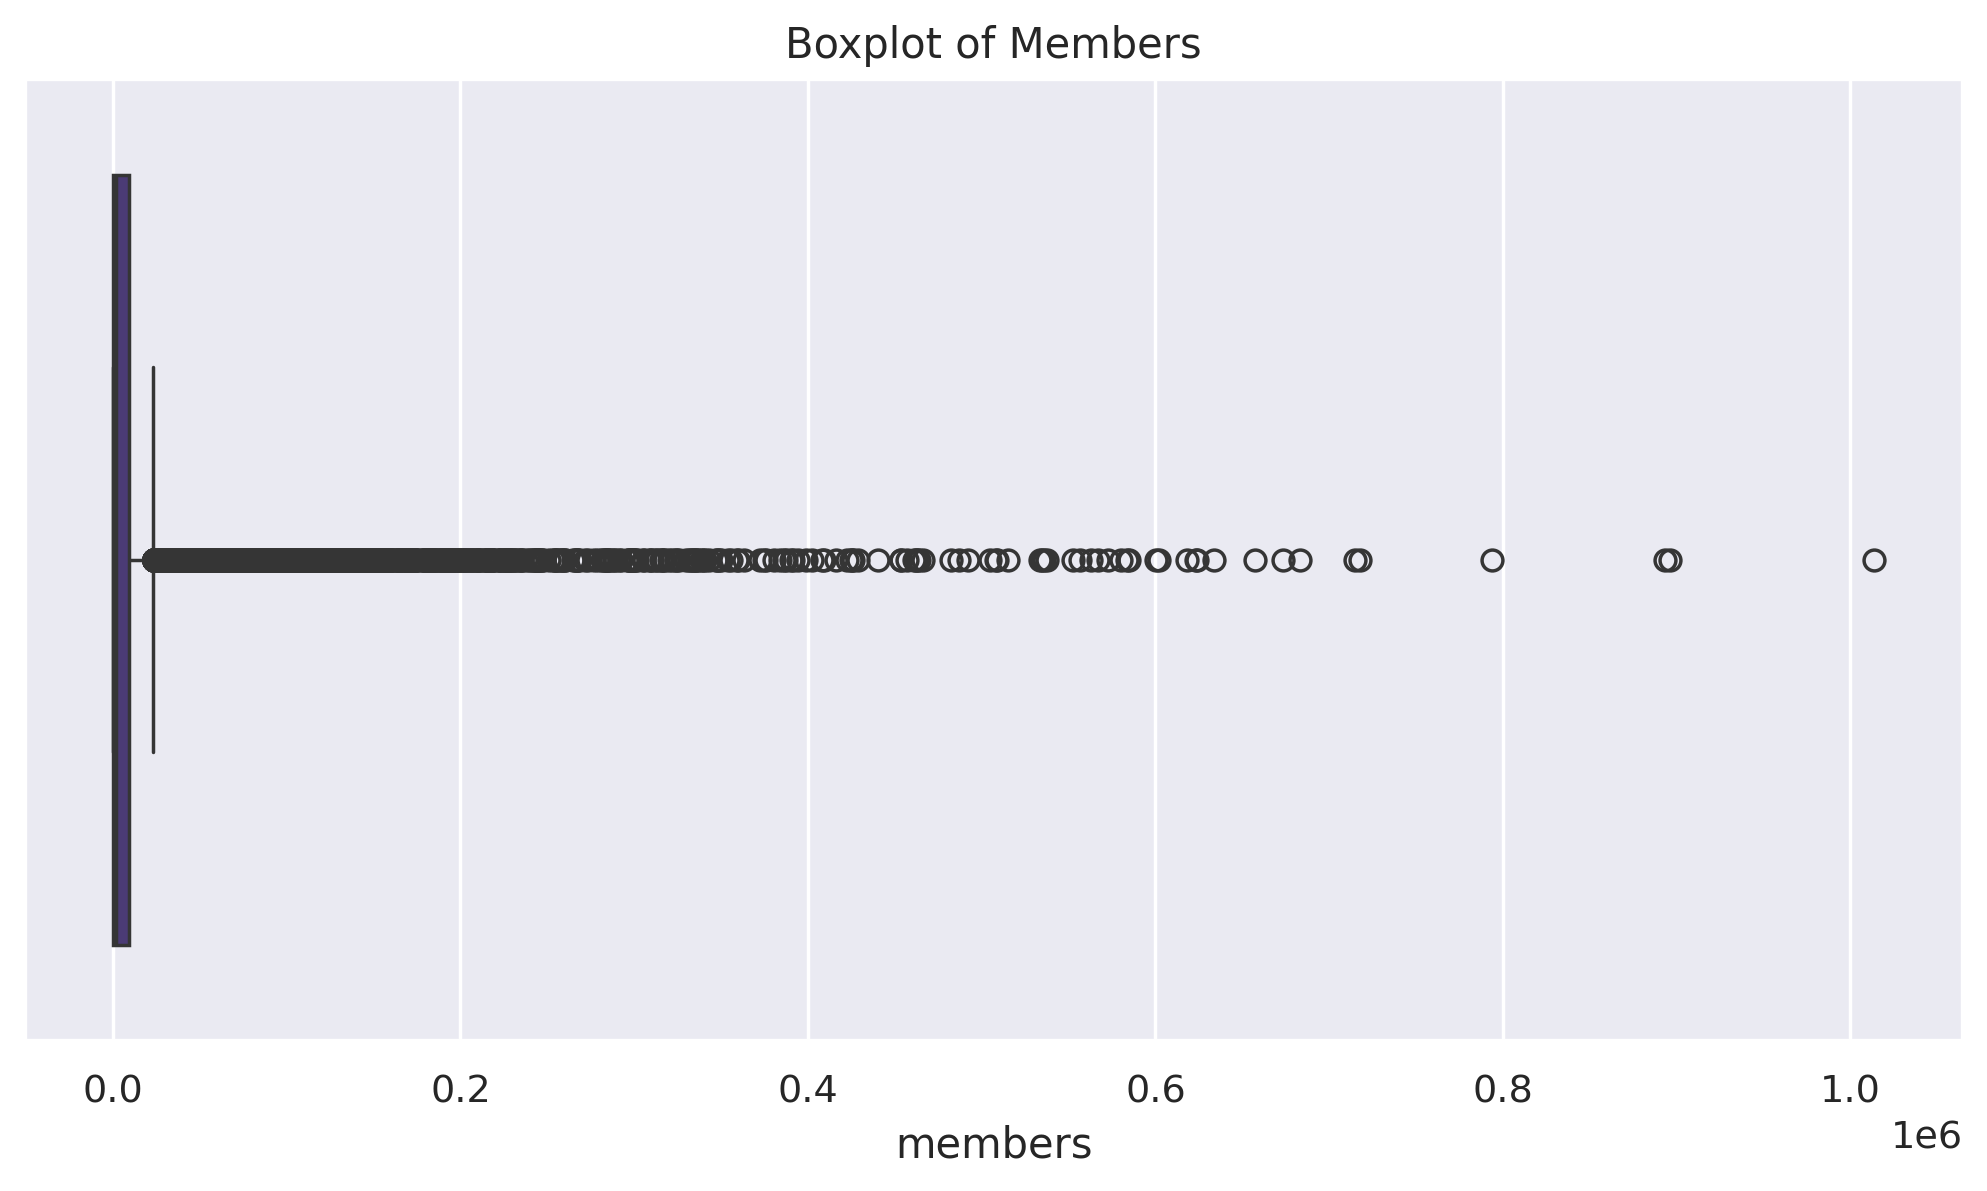

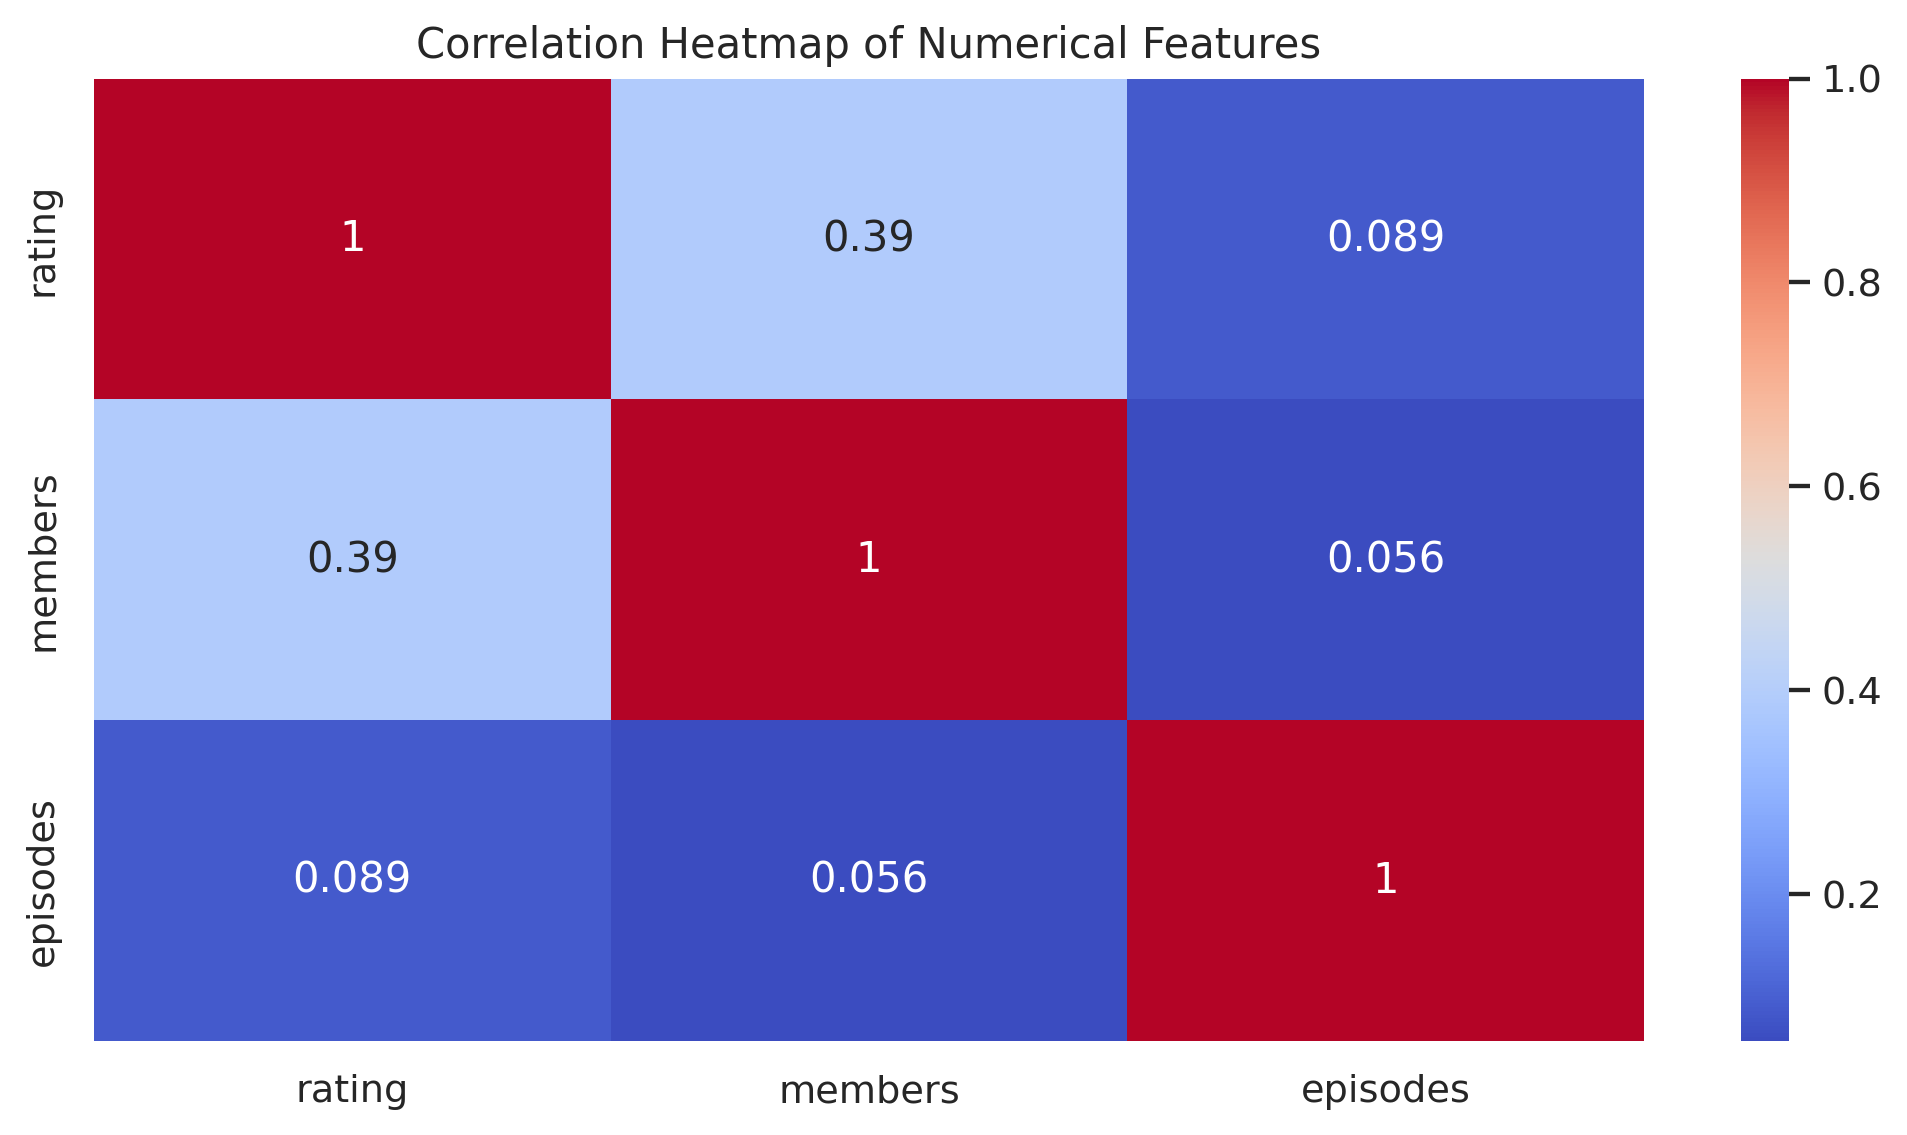

In [5]:
# Summary statistics of numeric columns
print("Basic Statistics of Numeric Columns:")
display(df.describe())

# Histograms for all numeric features
df.hist(bins=100, figsize=(12, 8))
plt.suptitle("Histograms of Numeric Columns", fontsize=16)
plt.tight_layout()
plt.show()

# Histogram: Distribution of Ratings
sns.histplot(df['rating'], bins=30, kde=True)
plt.title("Distribution of Anime Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

# Boxplot: Anime ID
sns.boxplot(x='anime_id', data=df)
plt.title("Boxplot of Anime ID")
plt.show()

# Boxplot: Episodes
sns.boxplot(x='episodes', data=df)
plt.title("Boxplot of Episodes")
plt.show()

# Boxplot: Rating
sns.boxplot(x='rating', data=df)
plt.title("Boxplot of Ratings")
plt.show()

# Boxplot: Members
sns.boxplot(x='members', data=df)
plt.title("Boxplot of Members")
plt.show()

# Correlation Heatmap (drop nulls to avoid NaN in corr matrix)
df_corr = df[['rating', 'members', 'episodes']].dropna()
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


# **Analyzing Categorical Features - Type, Genre, and Content Rating**

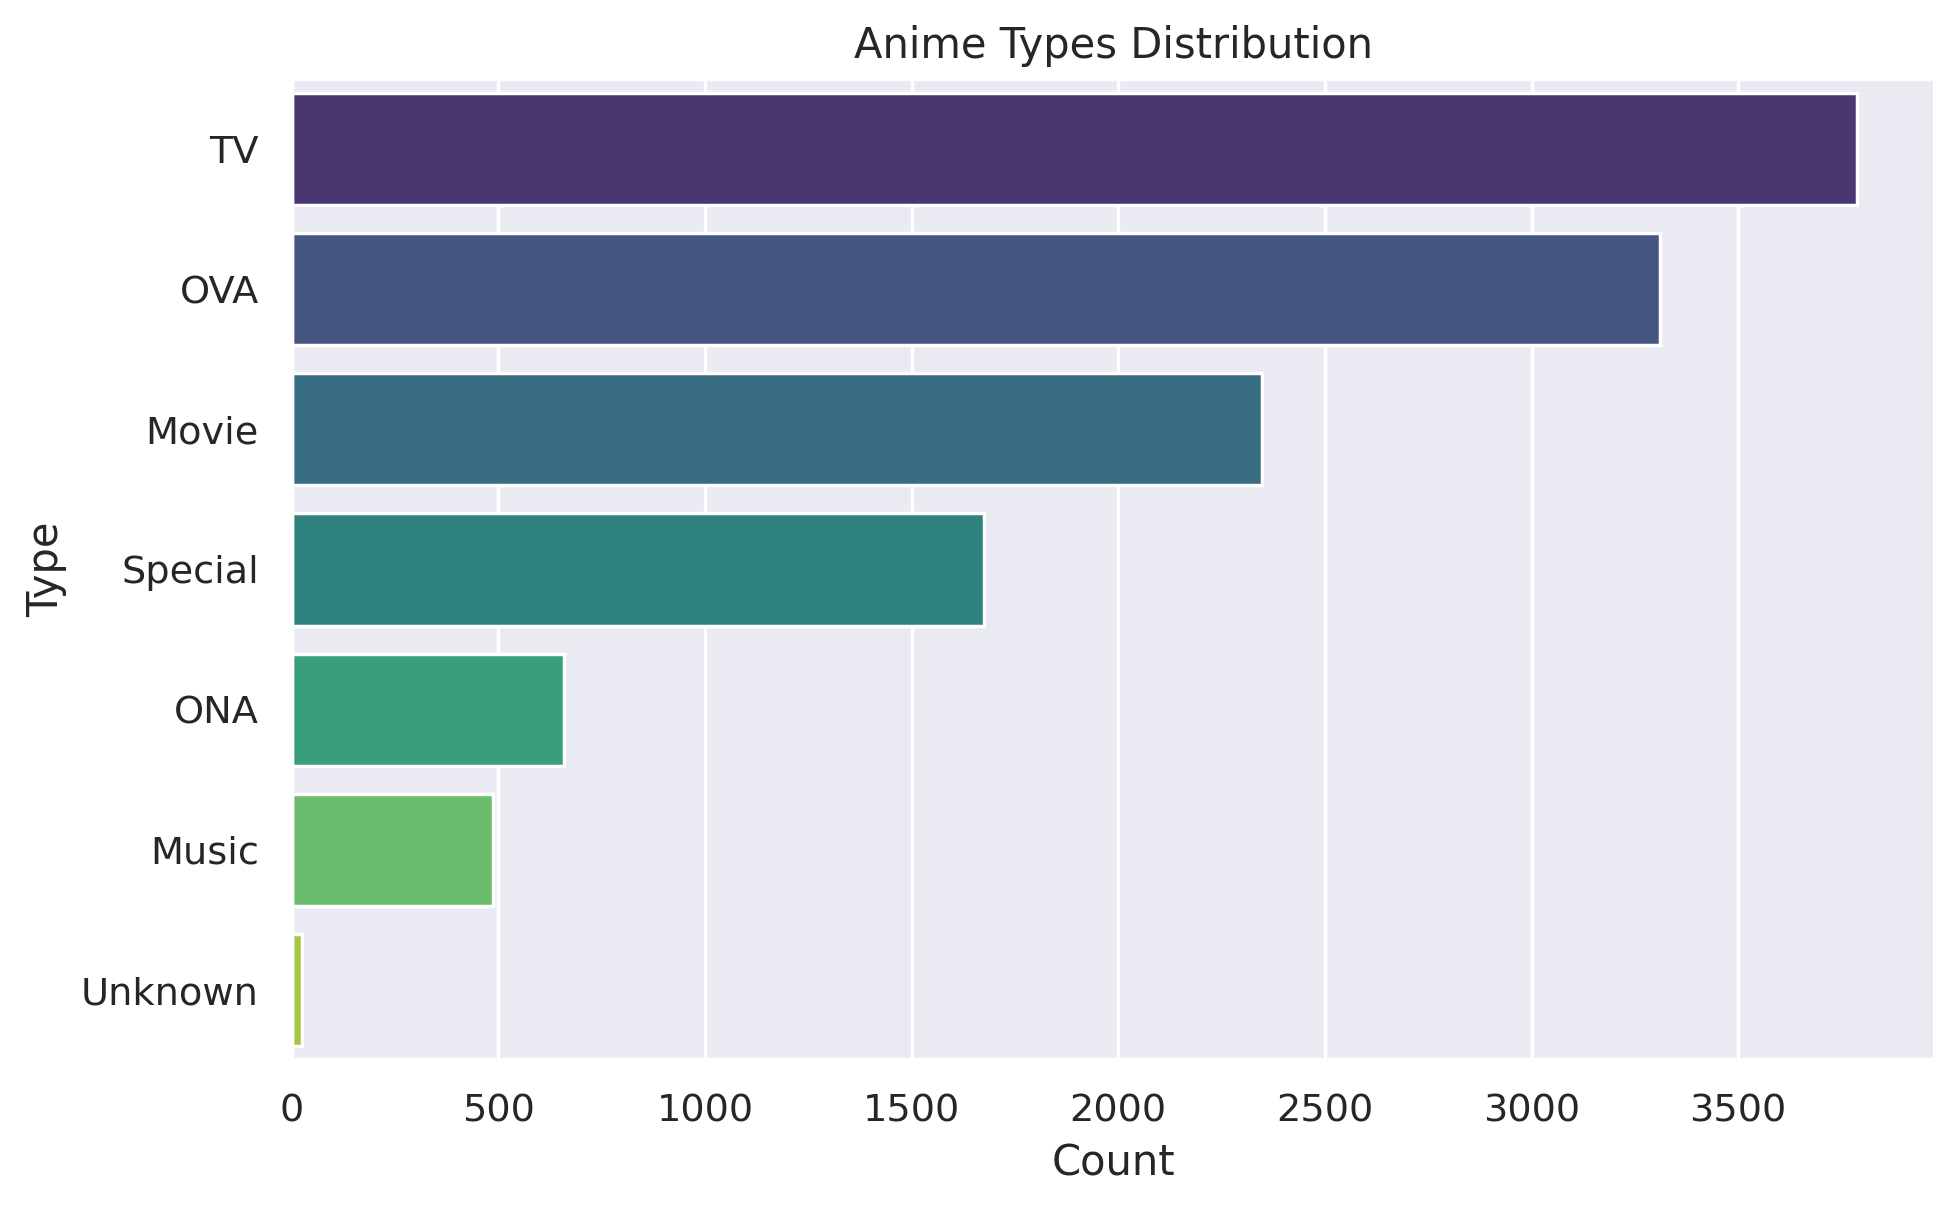

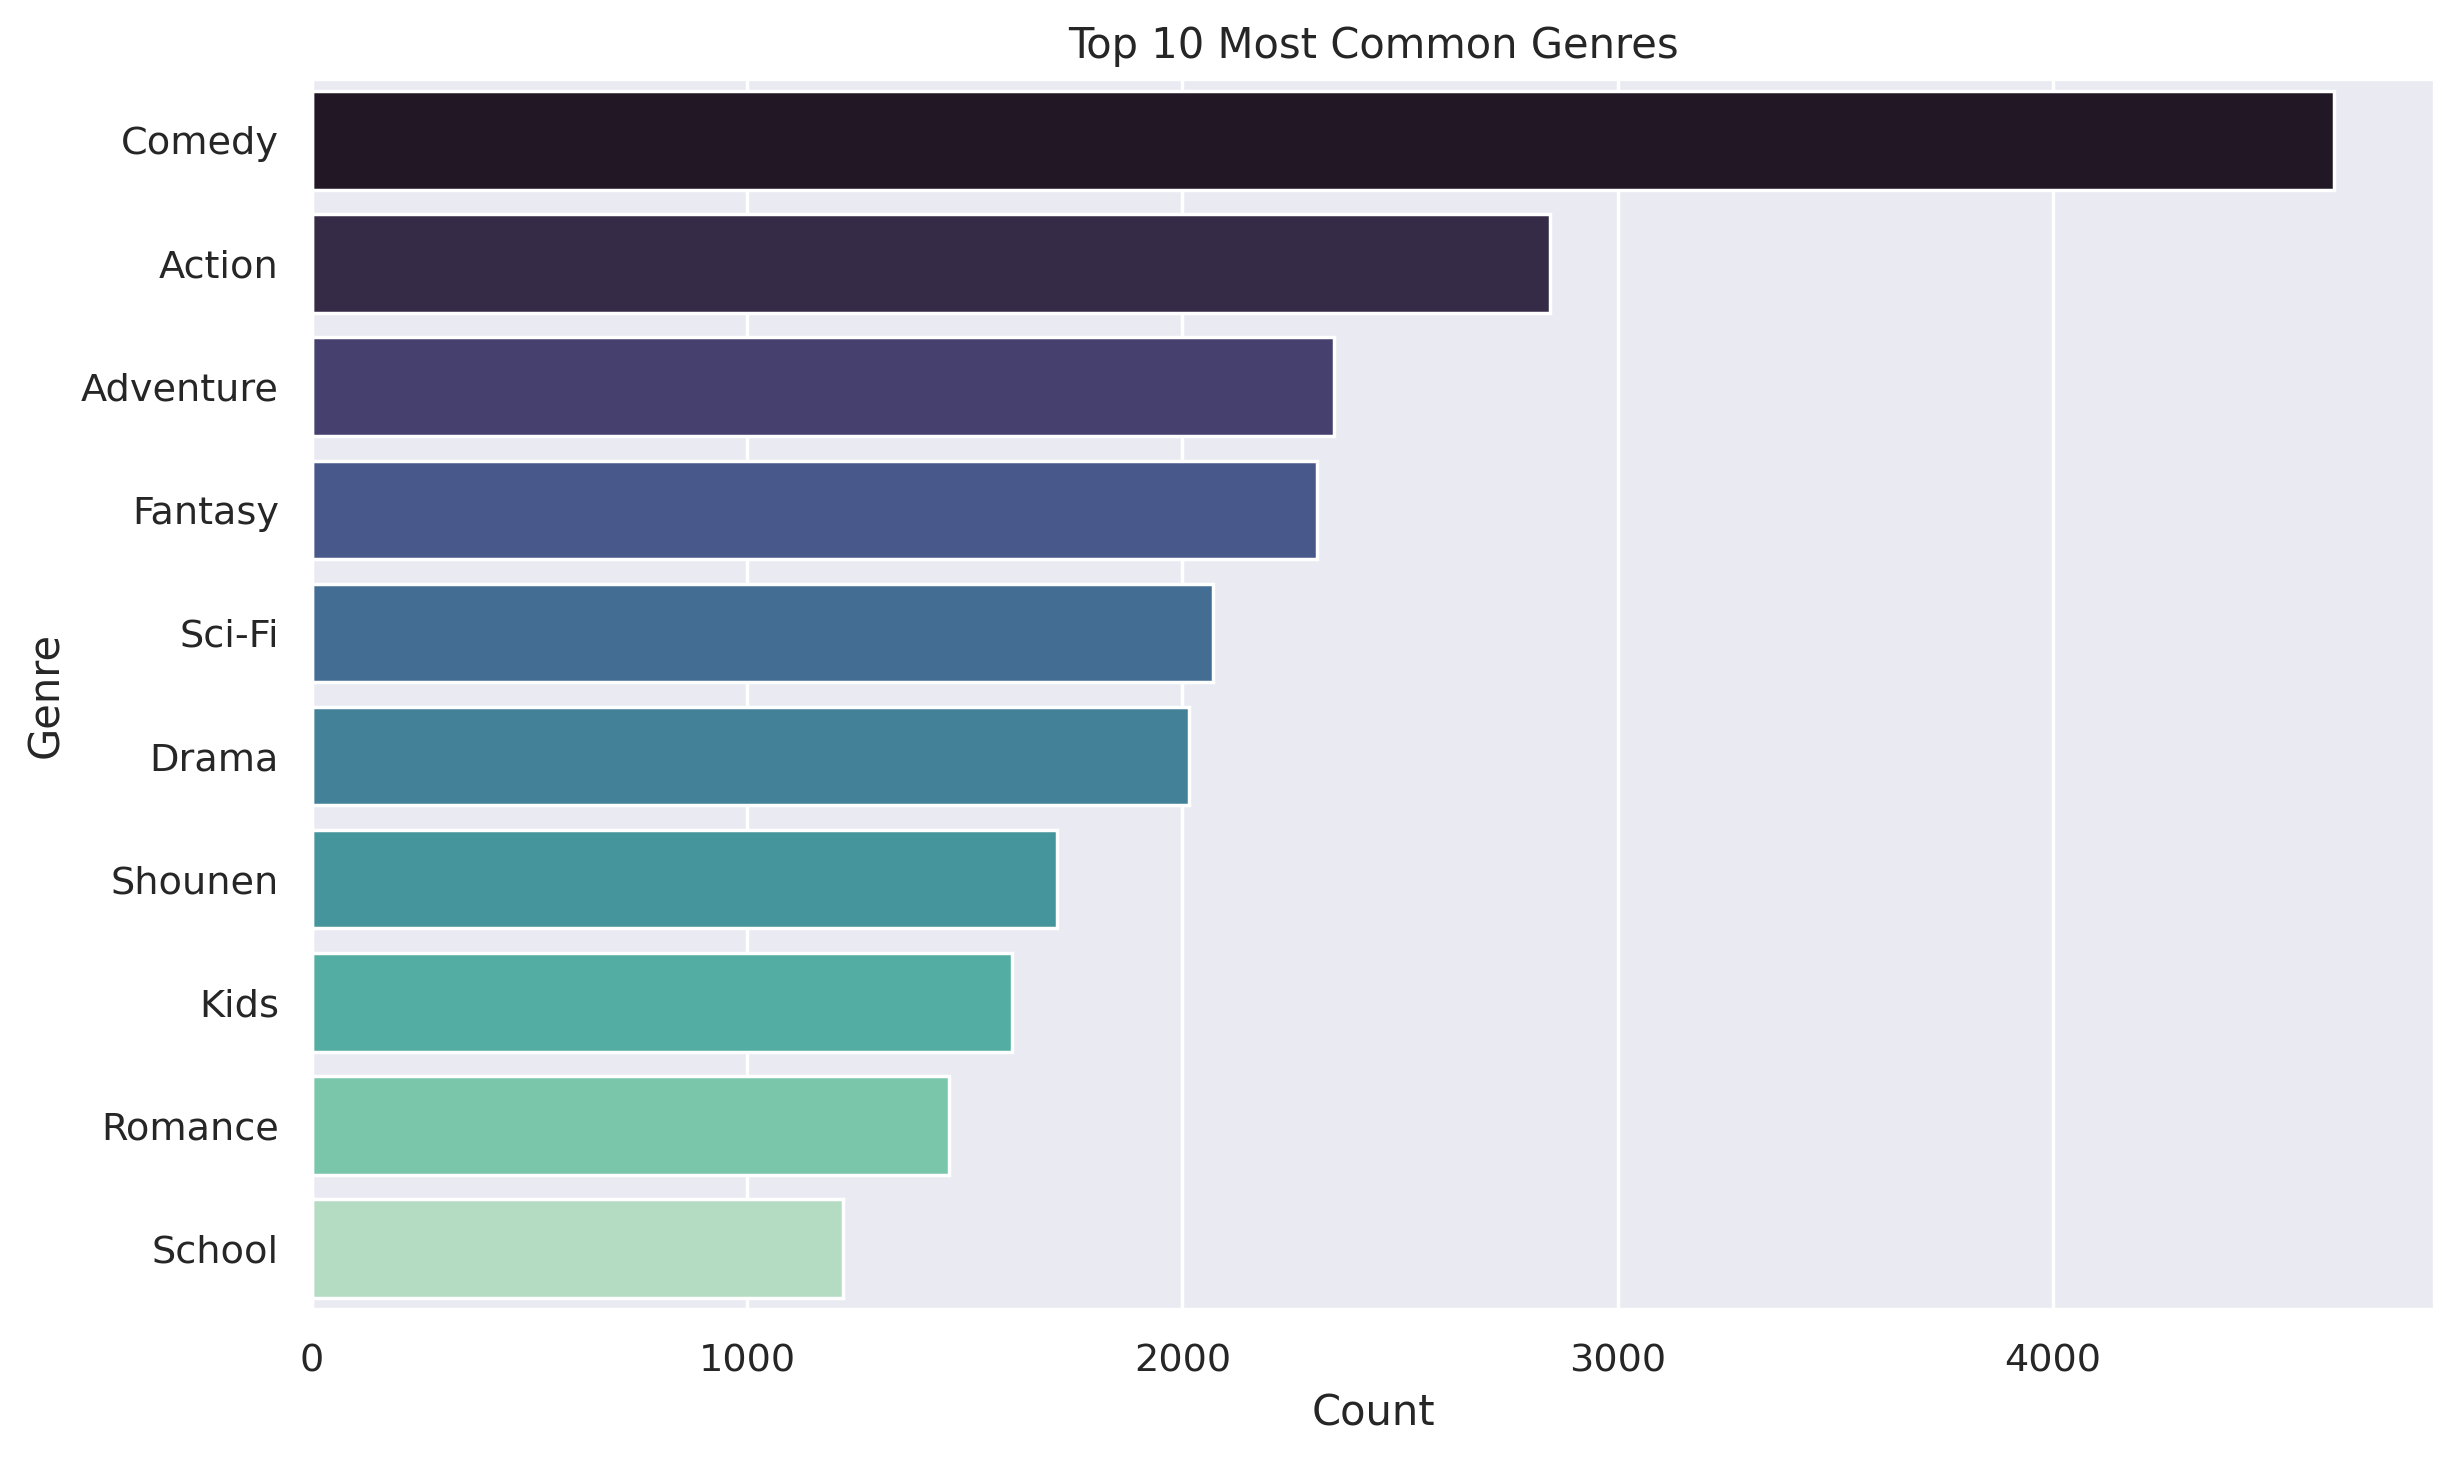

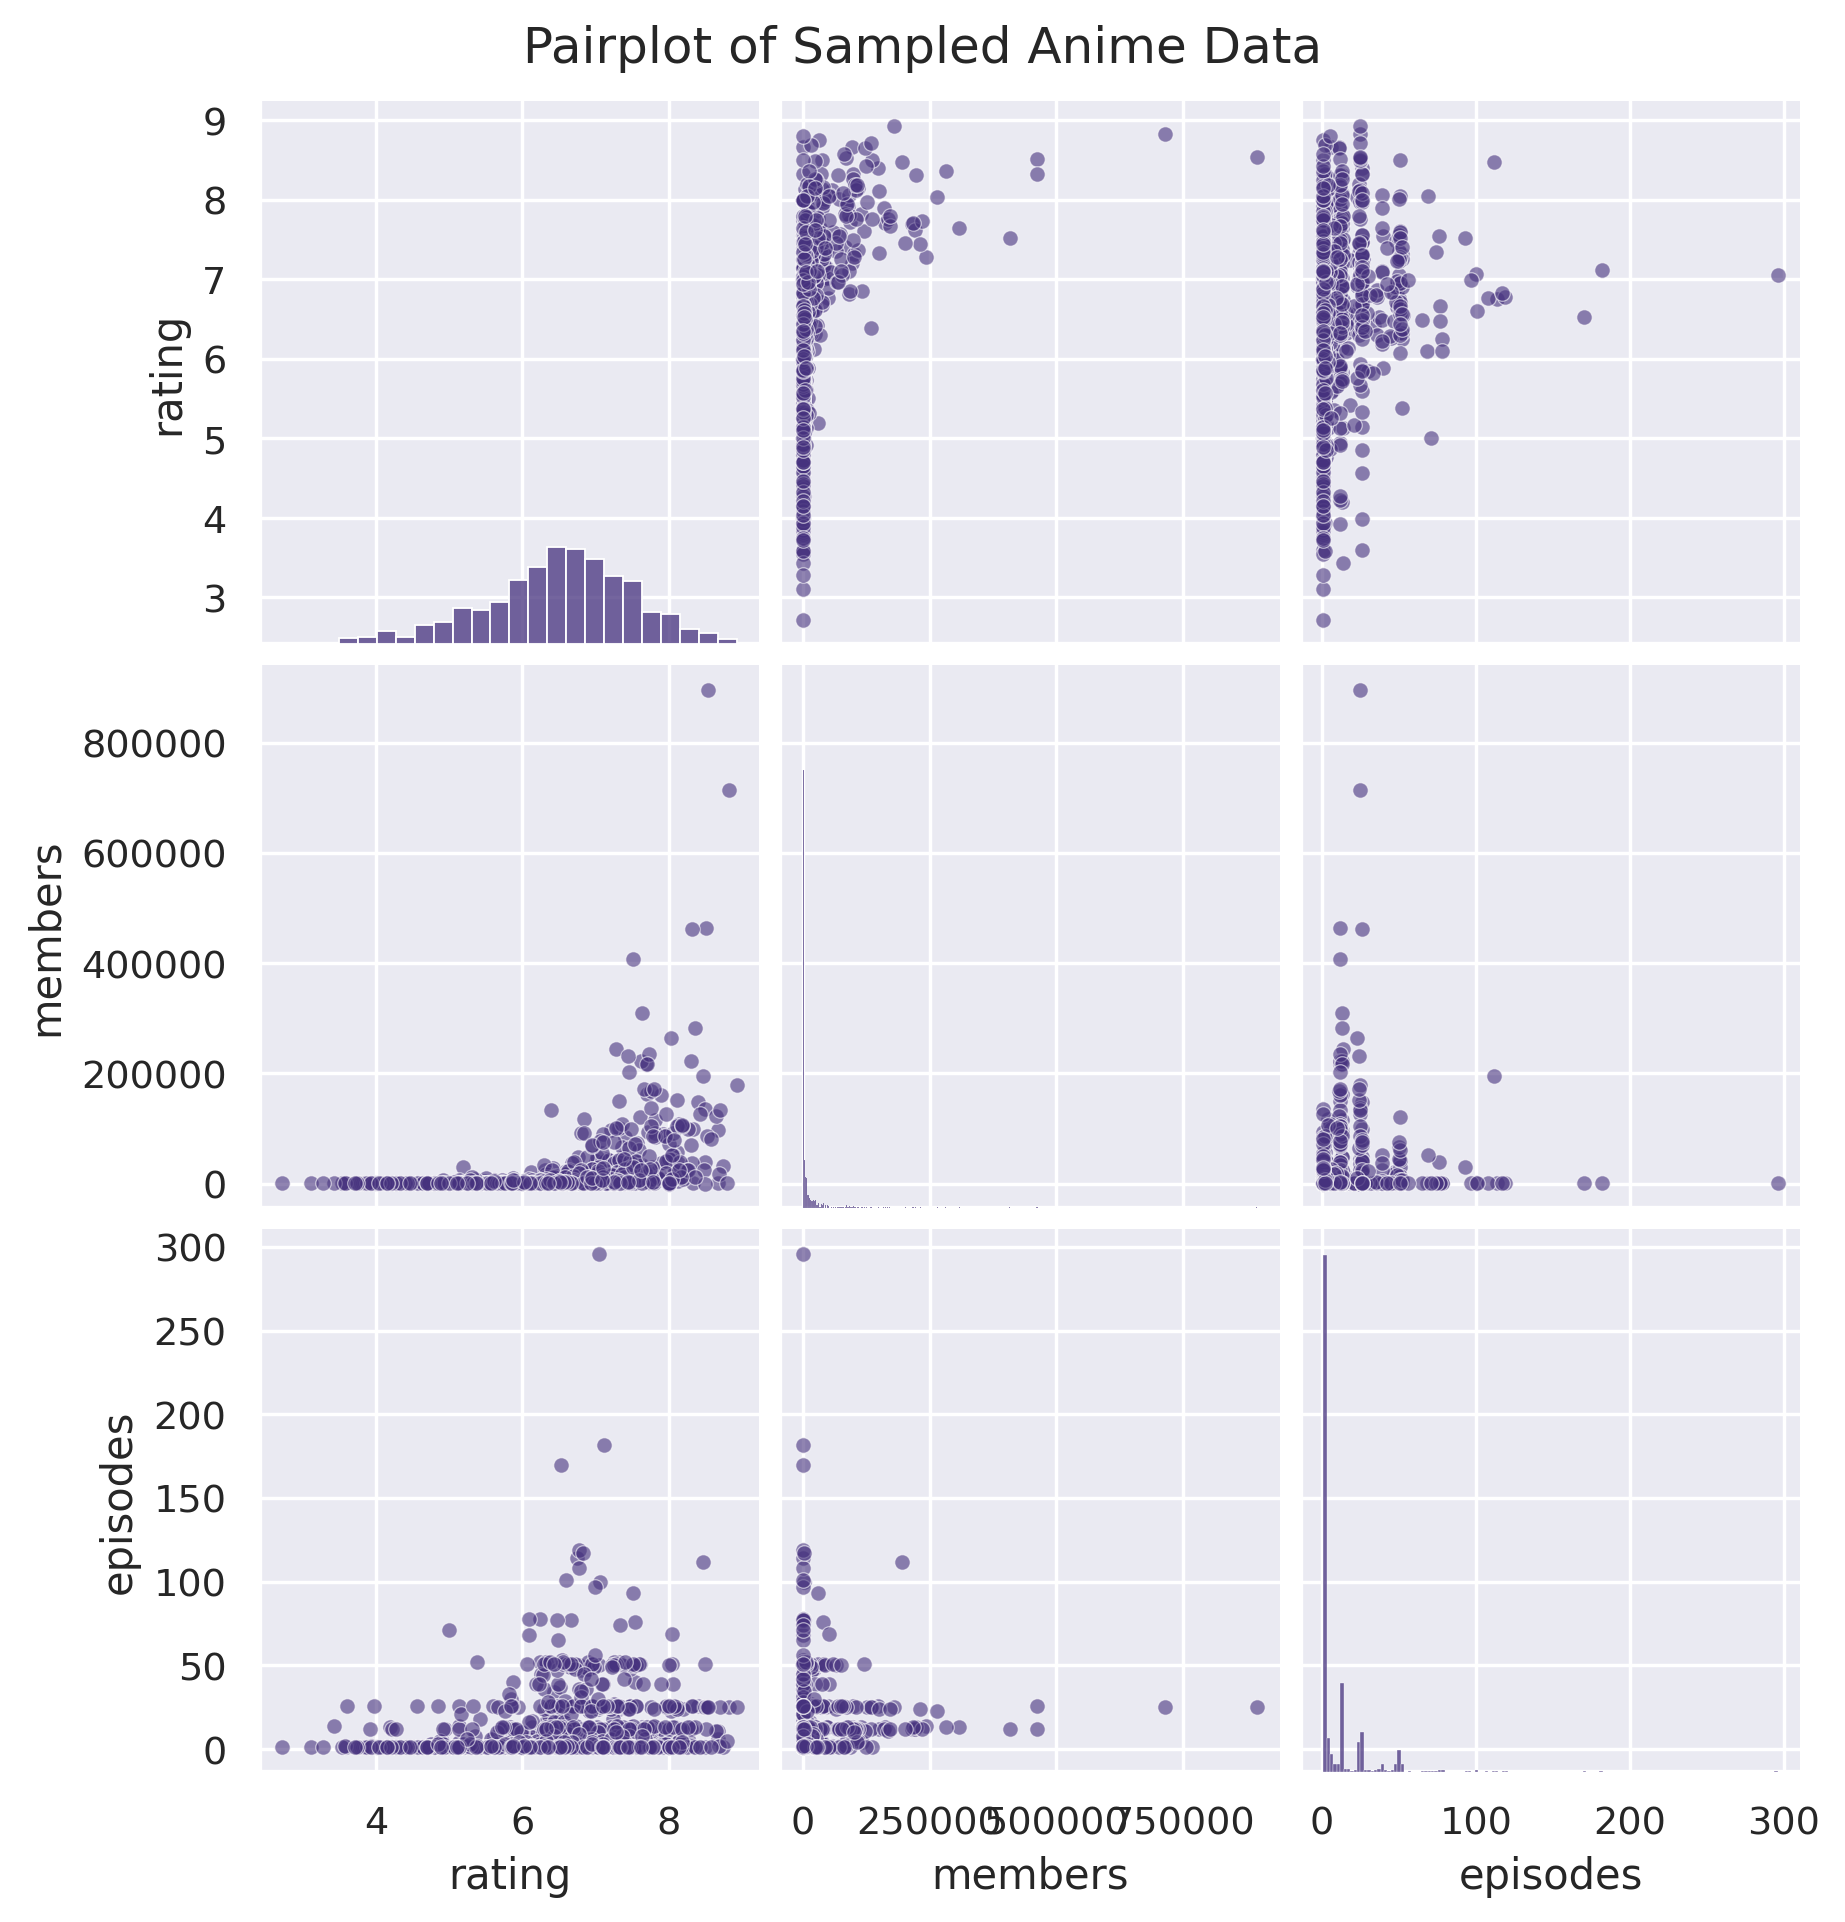

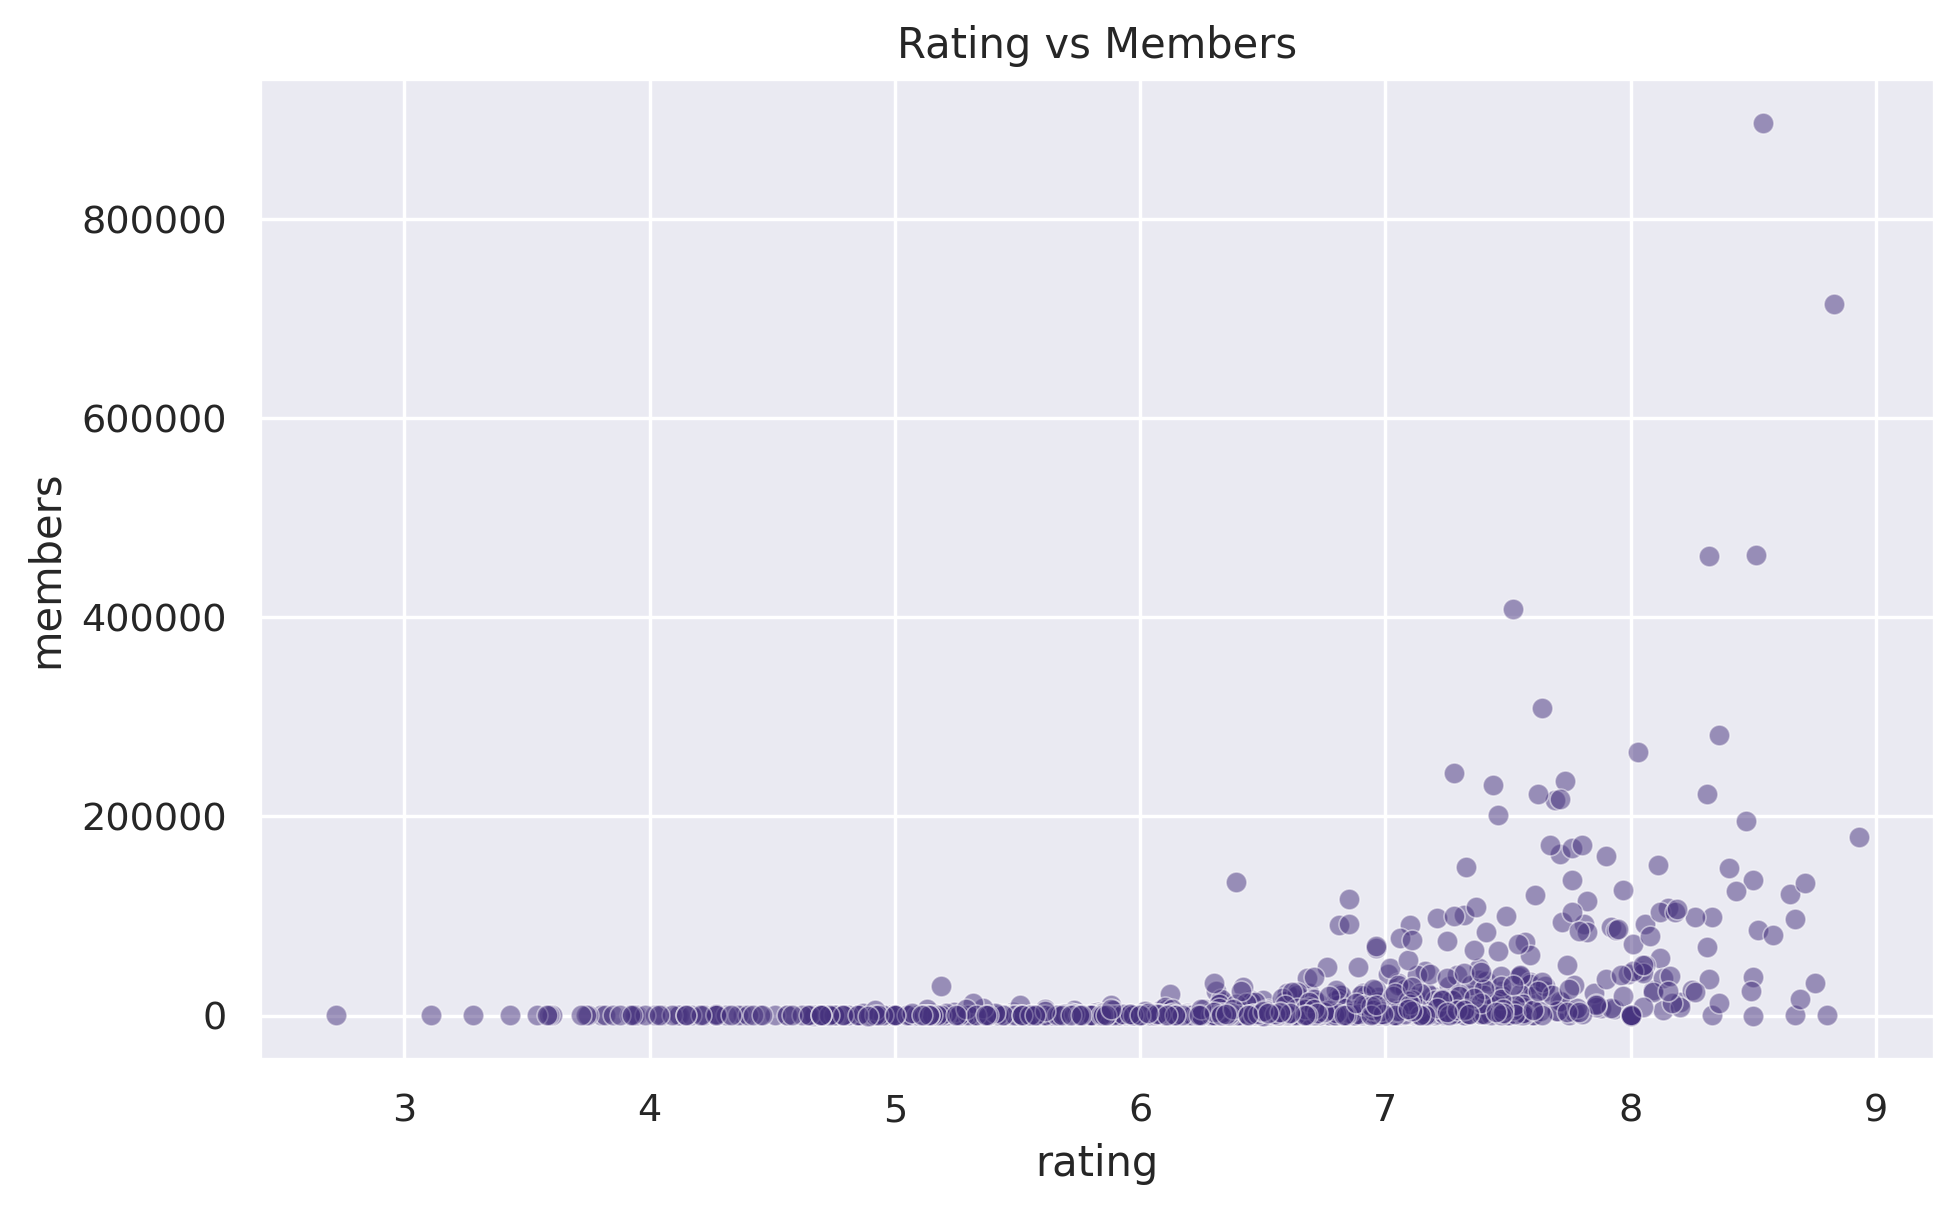

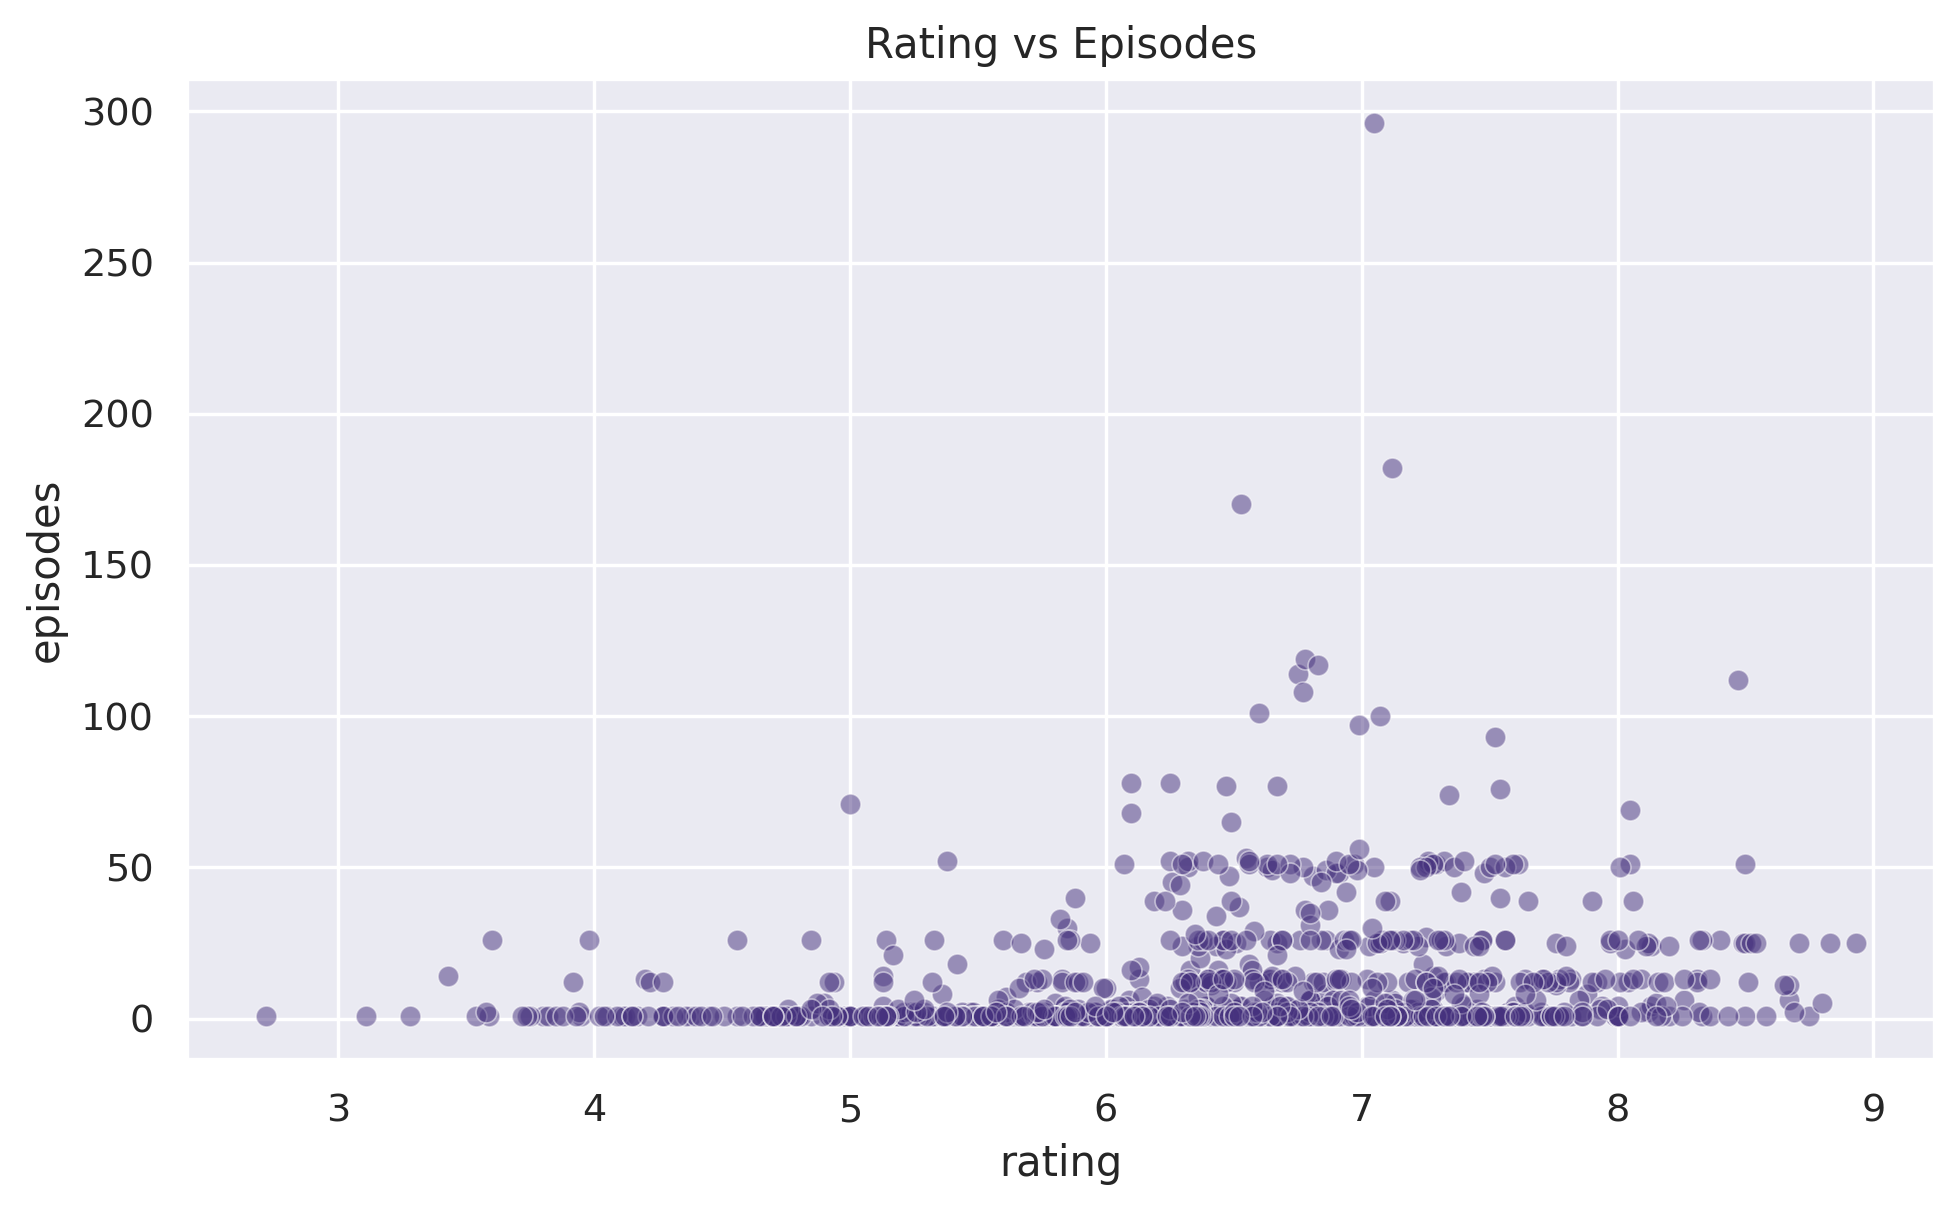

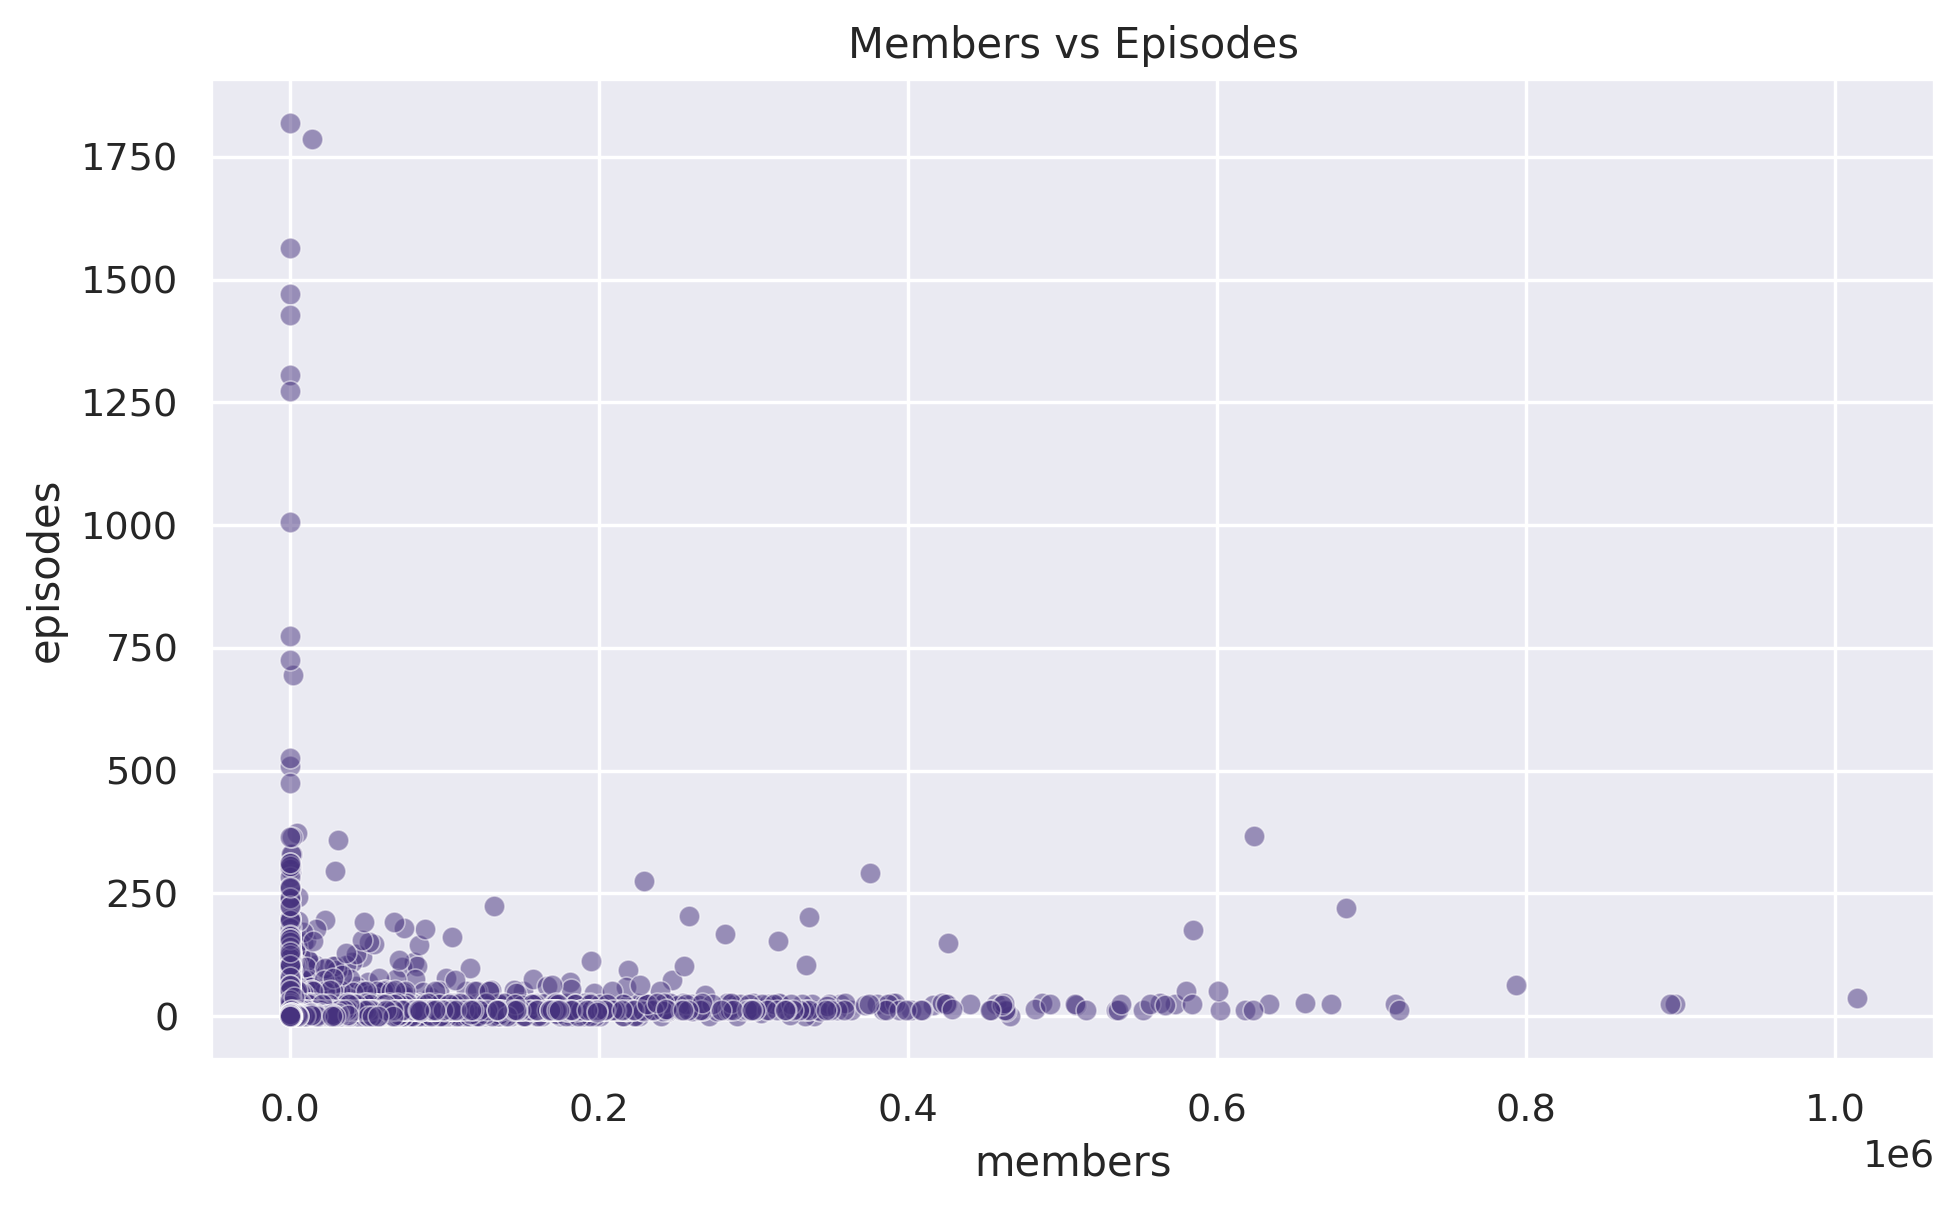

In [11]:
# Block 5: Categorical Analysis & Feature Relationships

# 5.1 Summary of Categorical Features
df.describe(include='object')

# 5.2 Value Counts for Anime Type
df['type'].value_counts()

# 5.3 Inspect Specific Anime by Name
df[df['name'] == 'Shi Wan Ge Leng Xiaohua']

# 5.4 Count Plot: Anime Type Distribution (Horizontal)
plt.figure(figsize=(8, 5))
sns.countplot(y=df['type'], order=df['type'].value_counts().index, palette='viridis')
plt.title('Anime Types Distribution')
plt.xlabel("Count")
plt.ylabel("Type")
plt.tight_layout()
plt.show()

# 5.5 Top 10 Most Common Genres (Exploded from string format)
from collections import Counter

# Handle missing genres and split into list
genre_series = df['genre'].dropna().str.split(', ').sum()
genre_counts = Counter(genre_series).most_common(10)
genres, counts = zip(*genre_counts)

# Barplot of genres
plt.figure(figsize=(10, 6))
sns.barplot(x=list(counts), y=list(genres), palette='mako')
plt.title("Top 10 Most Common Genres")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

# 5.6 Pairplot of Sampled Data (Performance Optimized)
sample_df = df[['rating', 'members', 'episodes']].dropna()
sample_df = sample_df[sample_df['rating'].apply(lambda x: str(x).replace('.', '', 1).isdigit())]
sample_df['rating'] = sample_df['rating'].astype(float)
sample_df = sample_df.sample(n=1000, random_state=42)

sns.pairplot(sample_df, plot_kws={'alpha': 0.6, 's': 20})
plt.suptitle("Pairplot of Sampled Anime Data", y=1.02)
plt.show()

# 5.7 Scatter Plot: Rating vs Members
plt.figure(figsize=(8,5))
sns.scatterplot(data=sample_df, x='rating', y='members', alpha=0.5)
plt.title('Rating vs Members')
plt.tight_layout()
plt.show()

# 5.8 Scatter Plot: Rating vs Episodes
plt.figure(figsize=(8,5))
sns.scatterplot(data=sample_df, x='rating', y='episodes', alpha=0.5)
plt.title('Rating vs Episodes')
plt.tight_layout()
plt.show()

# 5.9 Scatter Plot: Members vs Episodes
plt.figure(figsize=(8,5))
clean_df = df.dropna(subset=['members', 'episodes'])
sns.scatterplot(data=clean_df, x='members', y='episodes', alpha=0.5)
plt.title('Members vs Episodes')
plt.tight_layout()
plt.show()


# **Outlier Detection and Treatment**

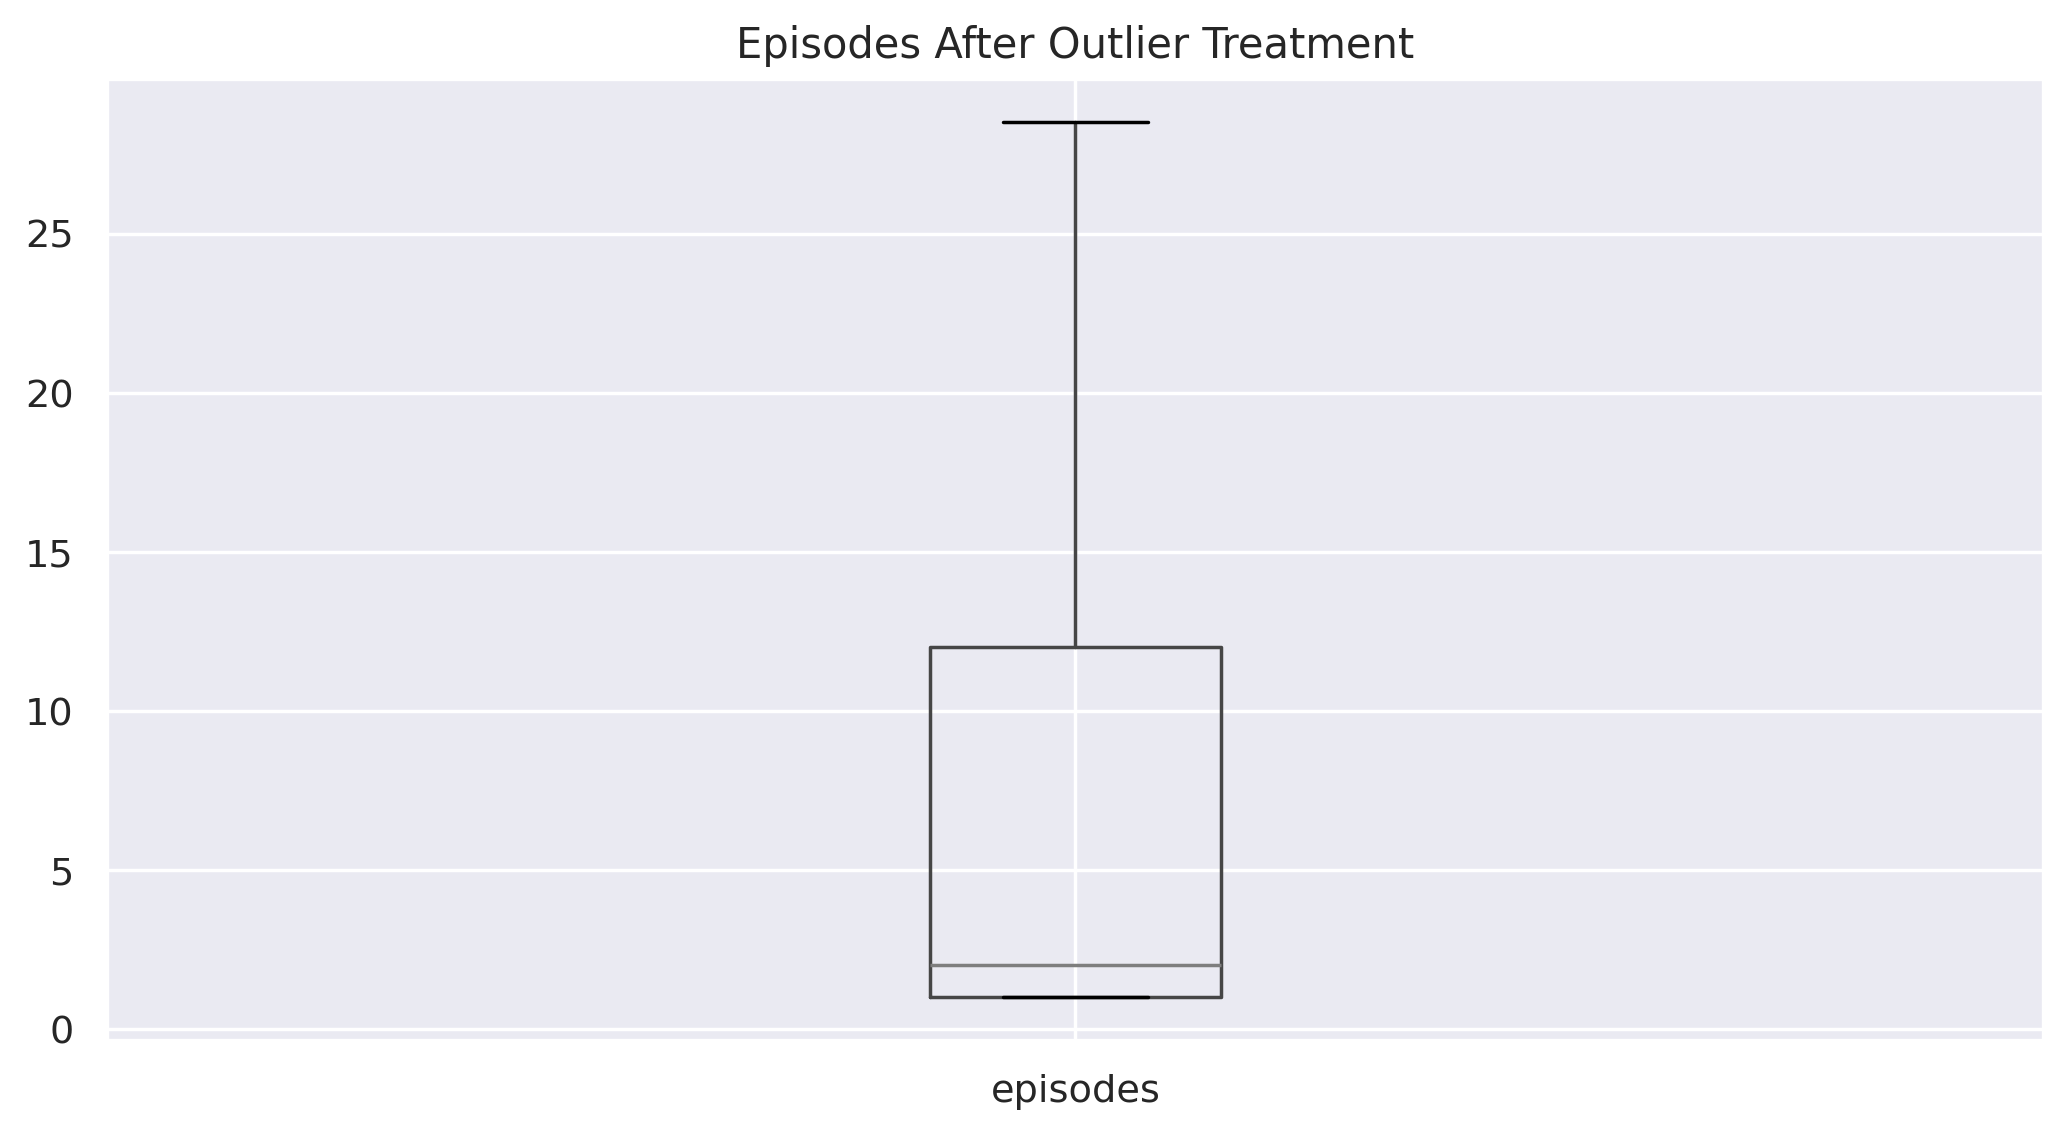

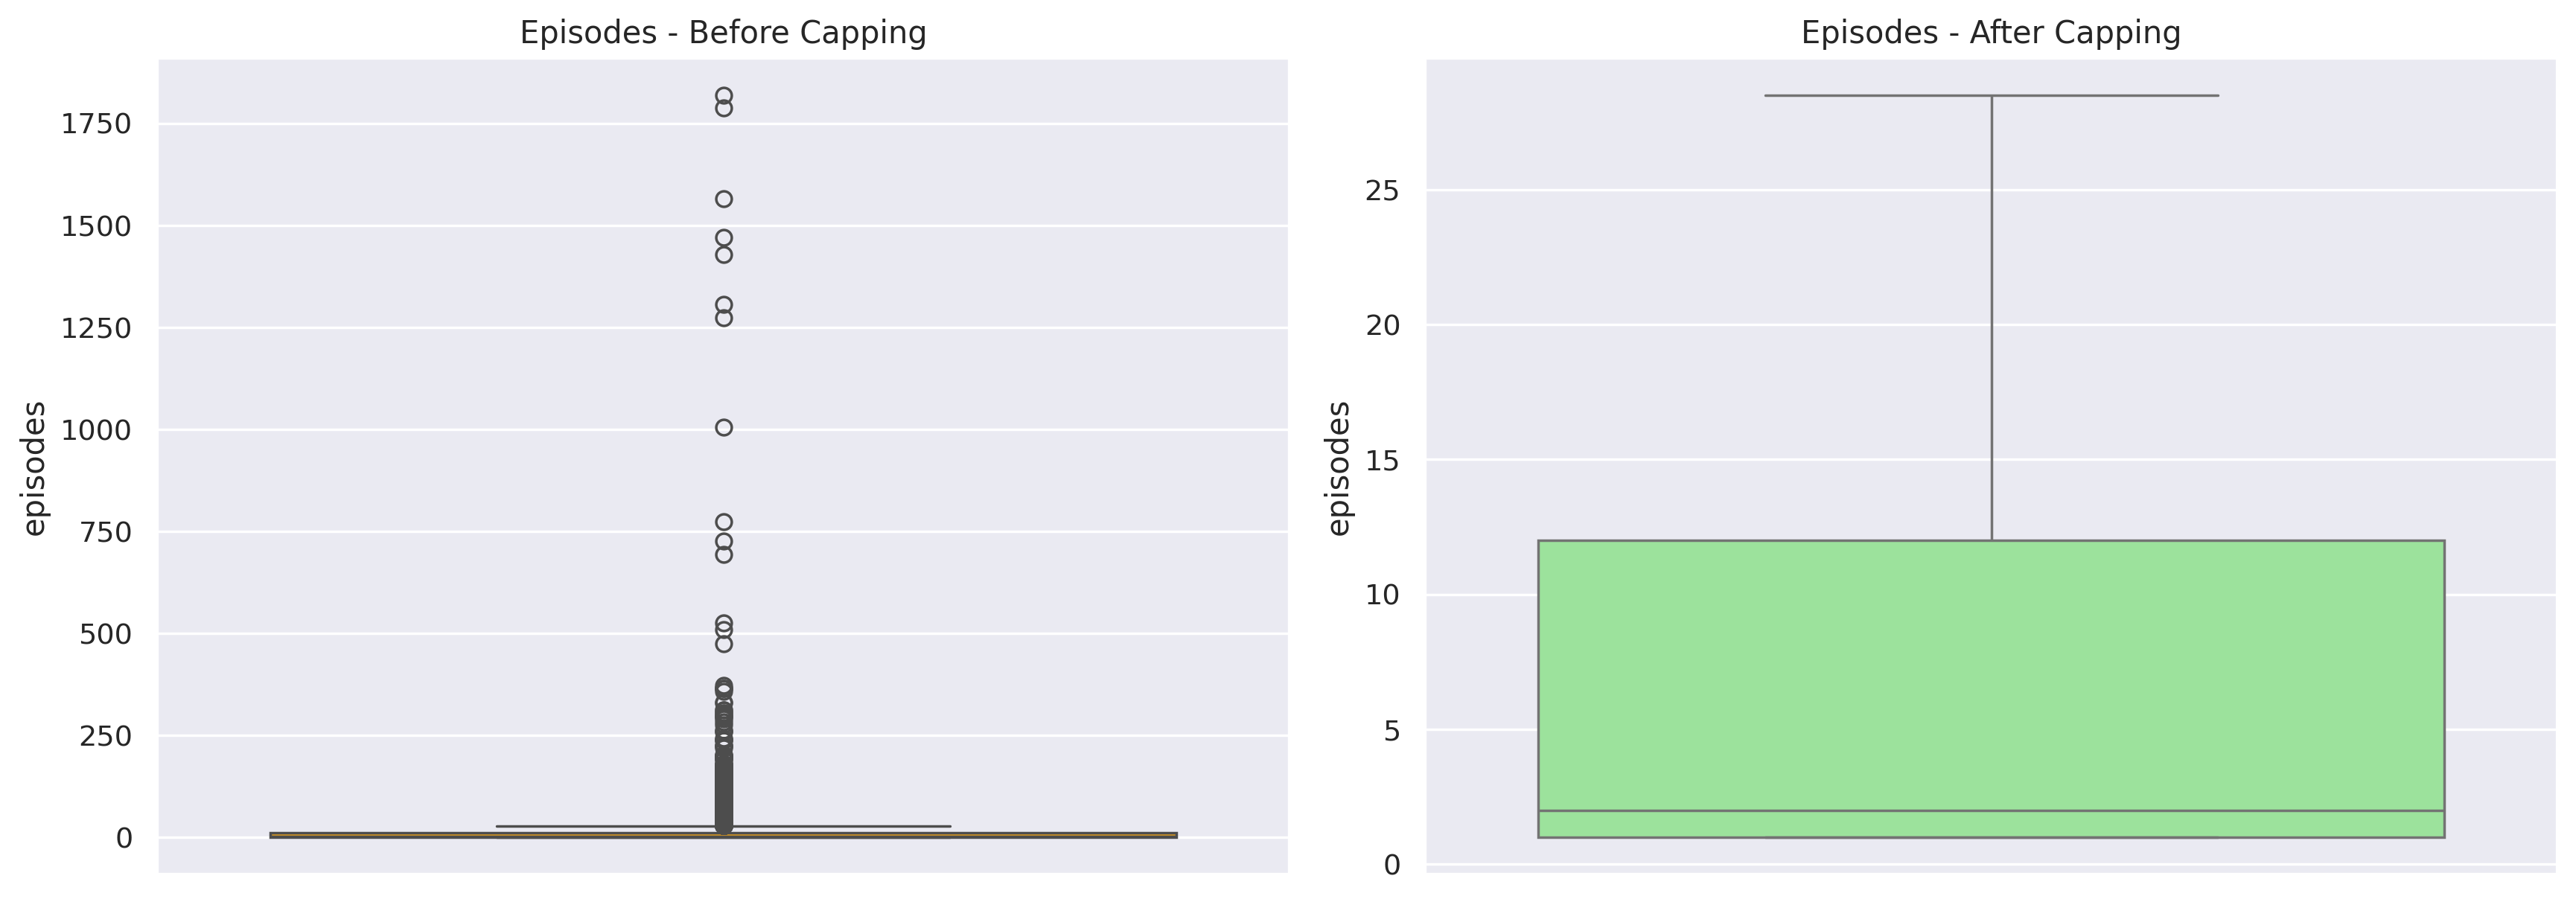

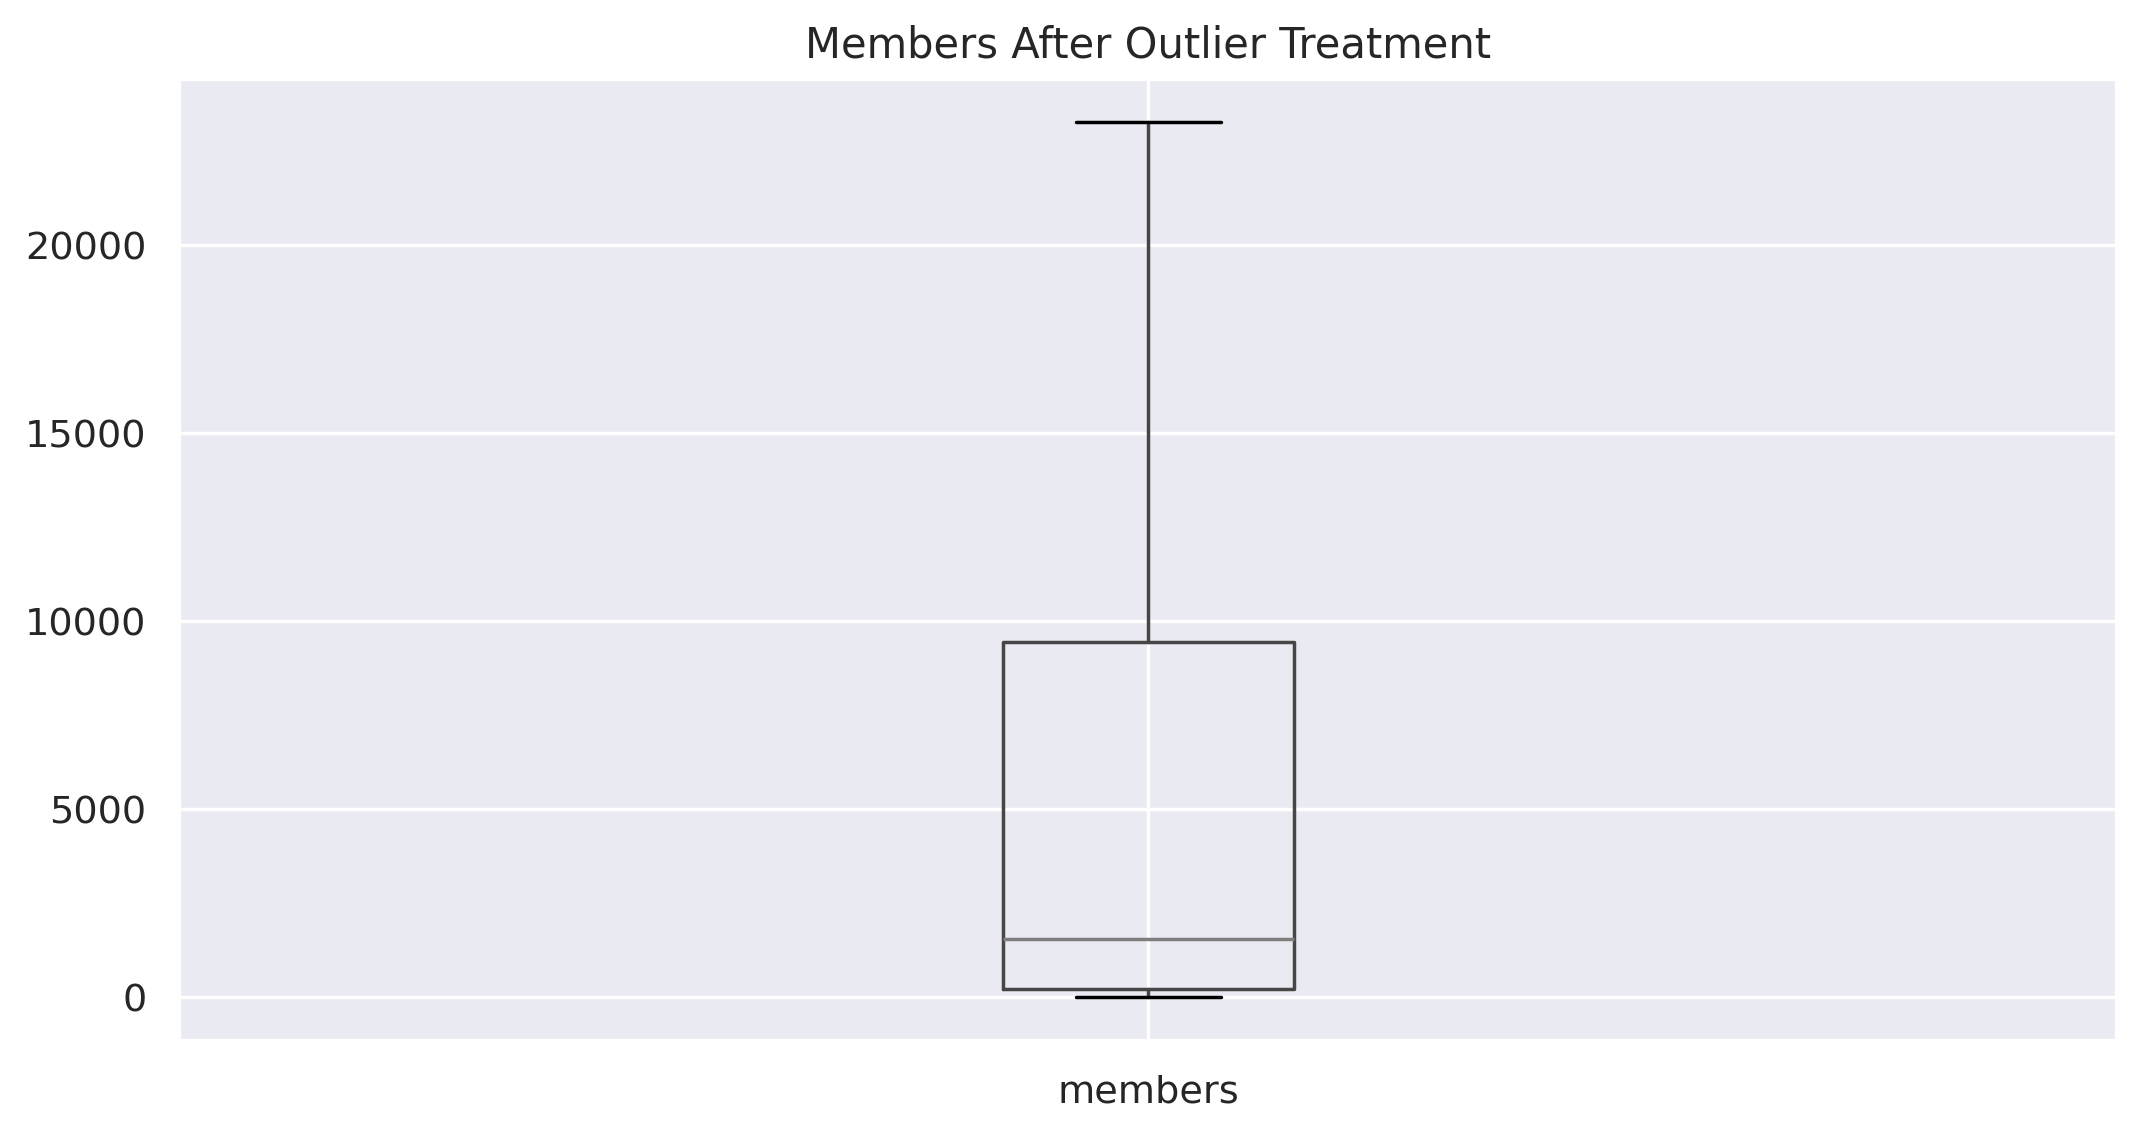

In [13]:
# Block 6: Outlier Detection and Treatment

# Step 1: Columns to treat for outliers
outliers_columns = ['episodes', 'members']

# Step 2: Function to detect outliers using IQR method
def outlier_detection(data, col_name):
    Q1 = data[col_name].quantile(0.25)
    Q3 = data[col_name].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return lower, upper

# Step 3: Detect outlier thresholds for each column
outlier_bounds = {}
for col in outliers_columns:
    outlier_bounds[col] = outlier_detection(df, col)
outlier_bounds

# Step 4: Cap the outliers using lower and upper bounds
for col in outlier_bounds:
    df.loc[df[col] < outlier_bounds[col][0], col] = outlier_bounds[col][0]
    df.loc[df[col] > outlier_bounds[col][1], col] = outlier_bounds[col][1]

# Step 5: Boxplot for 'episodes' after capping
df.boxplot(['episodes'])
plt.title('Episodes After Outlier Treatment')
plt.show()

# Step 6: Visual comparison before vs after outlier treatment

# Load original dataset to compare 'episodes'
df_before_outliers = pd.read_csv('/content/anime.csv')
df_before_outliers['episodes'].replace('Unknown', np.nan, inplace=True)
df_before_outliers['episodes'] = pd.to_numeric(df_before_outliers['episodes'])

# Plot boxplots side by side
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
sns.boxplot(y='episodes', data=df_before_outliers, ax=ax[0], color='orange')
ax[0].set_title("Episodes - Before Capping")

sns.boxplot(y='episodes', data=df, ax=ax[1], color='lightgreen')
ax[1].set_title("Episodes - After Capping")

plt.tight_layout()
plt.show()

# Step 7: Boxplot for 'members' after capping
df.boxplot(['members'])
plt.title('Members After Outlier Treatment')
plt.show()


# **Handle Missing Values**

In [14]:
# Block 7: Handle Missing Values

# Step 1: Check missing values across columns
df.isna().sum()

# Step 2: Inspect 'episodes' count grouped by 'type'
df.groupby("type")["episodes"].value_counts().head()

# Step 3: Identify rows with missing 'type'
df[df['type'].isna()]

# Step 4: Drop rows where 'type' is missing
df.dropna(subset=['type'], inplace=True)

# Step 5: Verify missing values again
df.isna().sum()

# Step 6: Fill missing 'episodes' using median of each 'type'
show_types = df['type'].value_counts().index
for t in show_types:
    median_val = df[df['type'] == t]['episodes'].median()
    df.loc[(df['type'] == t) & (df['episodes'].isna()), 'episodes'] = median_val

# Step 7: Verify again after filling 'episodes'
df.isna().sum()

# Step 8: Fill missing 'genre' with 'Unknown'
df['genre'].fillna('Unknown', inplace=True)

# Step 9: Fill missing 'rating' with 0 (assumed unrated or unrated yet)
df['rating'].fillna(0, inplace=True)

# Step 10: Final null check
df.isna().sum()


,0
anime_id,0
name,0
genre,0
type,0
episodes,25
rating,0
members,0


# **Feature Engineering**

In [16]:
# Step 1: One-Hot Encode the 'genre' column
genre_encoded = df['genre'].str.get_dummies(sep=', ')

# Step 2: Concatenate encoded genres with original DataFrame
df_genre = pd.concat([genre_encoded, df], axis=1)

# Step 3: Drop unnecessary columns that won’t be used in similarity computation
df_genre.drop(columns=['name', 'genre', 'members', 'episodes'], inplace=True)

# ✅ Fix: Ensure 'rating' is numeric before filtering
df_genre['rating'] = pd.to_numeric(df_genre['rating'], errors='coerce')  # safely convert

# Step 4: One-Hot Encode the 'type' column
df_type = pd.get_dummies(df_genre, columns=['type'])

# Step 5: Filter animes with high rating (e.g., rating ≥ 8)
df_filtered = df_type[df_type['rating'] >= 8]

# Step 6: Drop 'rating' column before computing similarity
df_final = df_filtered.drop(columns=['rating'])

# Step 7: Preview the processed data
df_final.head()


,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,...,Yaoi,Yuri,anime_id,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV,type_Unknown
0,0,0,0,0,0,0,1,0,0,0,...,0,0,32281,True,False,False,False,False,False,False
1,1,1,0,0,0,0,1,0,1,0,...,0,0,5114,False,False,False,False,False,True,False
2,1,0,0,1,0,0,0,0,0,0,...,0,0,28977,False,False,False,False,False,True,False
3,0,0,0,0,0,0,0,0,0,0,...,0,0,9253,False,False,False,False,False,True,False
4,1,0,0,1,0,0,0,0,0,0,...,0,0,9969,False,False,False,False,False,True,False


# **Similarity Computation**

In [17]:
# Step 1: Drop anime_id if still present (not needed for similarity calc)
df_similarity = df_final.drop(columns=['anime_id'])

# Step 2: Import cosine distance function
from sklearn.metrics import pairwise_distances

# Step 3: Compute Cosine Distance Matrix
cosine_distances = pairwise_distances(df_similarity, metric='cosine')

# Step 4: Convert to Cosine Similarity Matrix (1 - distance)
cosine_similarity = 1 - cosine_distances

# Step 5: Remove self-similarity by zeroing diagonal
import numpy as np
np.fill_diagonal(cosine_similarity, 0)

# Step 6: Convert to Pandas DataFrame for easier access
similarity_df = pd.DataFrame(cosine_similarity)

# Step 7: Preview similarity matrix
similarity_df.head()


,0,1,2,3,4,5,6,7,8,9,...,617,618,619,620,621,622,623,624,625,626
0,0.000000,0.158114,0.000000,0.000000,0.000000,0.365148,0.000000,0.200000,0.158114,0.000000,...,0.316228,0.000000,0.000000,0.258199,0.258199,0.000000,0.182574,0.316228,0.258199,0.0
1,0.158114,0.000000,0.375000,0.204124,0.375000,0.433013,0.632456,0.316228,0.250000,0.375000,...,0.000000,0.204124,0.612372,0.204124,0.204124,0.408248,0.288675,0.000000,0.204124,0.0
2,0.000000,0.375000,0.000000,0.408248,1.000000,0.433013,0.474342,0.158114,0.875000,1.000000,...,0.000000,0.408248,0.204124,0.000000,0.000000,0.000000,0.144338,0.250000,0.000000,0.0
3,0.000000,0.204124,0.408248,0.000000,0.408248,0.235702,0.258199,0.258199,0.204124,0.408248,...,0.000000,0.333333,0.333333,0.000000,0.000000,0.000000,0.235702,0.000000,0.000000,0.0
4,0.000000,0.375000,1.000000,0.408248,0.000000,0.433013,0.474342,0.158114,0.875000,1.000000,...,0.000000,0.408248,0.204124,0.000000,0.000000,0.000000,0.144338,0.250000,0.000000,0.0


# **Recommendation System**

In [18]:
# Step 1: Function to get anime_id(s) by anime name
def get_anime_ids(df, name):
    return df[df["name"] == name]["anime_id"].tolist()

# Step 2: Function to print top 5 similar animes for a given anime
def print_similar_animes(original_df, similarity_df, anime_name):
    anime_ids = get_anime_ids(original_df, anime_name)
    if not anime_ids:
        print(f"Anime '{anime_name}' not found.")
        return

    for aid in anime_ids:
        try:
            index = df_filtered[df_filtered['anime_id'] == aid].index[0]
            similar_indexes = similarity_df.iloc[index].sort_values(ascending=False).index[:5]

            print(f"\nTop 5 recommendations for '{anime_name}' (anime_id: {aid}):")
            for i in similar_indexes:
                similar_anime_id = df_filtered.iloc[i]['anime_id']
                similar_anime_name = original_df[original_df['anime_id'] == similar_anime_id]['name'].values
                if len(similar_anime_name) > 0:
                    print("-", similar_anime_name[0])
        except IndexError:
            print(f"Anime ID {aid} not found in filtered dataset.")

# Step 3: Test the recommendation system
print_similar_animes(original_df=df, similarity_df=similarity_df, anime_name="Mononoke Hime")



Top 5 recommendations for 'Mononoke Hime' (anime_id: 164):
- Omae Umasou da na
- Kaze no Tani no Nausicaä
- One Piece Film: Gold
- Sennen Joyuu
- One Piece Film: Strong World


# **Summary and Insights**

In [23]:
# Step 1: Print Success Message

print(" Recommendation System Summary ".center(80))
print("We successfully built a content-based anime recommendation system using metadata such as genre, type, and rating.")

# Step 2: Highlight Key Techniques Used
print("\nKey Techniques Applied:")
print("- Data Cleaning (handling missing values and outliers)")
print("- Feature Engineering (One-Hot Encoding of Genre and Type)")
print("- Similarity Computation using Cosine Similarity")
print("- Custom Recommendation Function")

# Step 3: Suggestions for Improvement
print("\nSuggestions for Future Improvements:")
print("-  Include user ratings for collaborative filtering")
print("-  Use NLP (e.g., TF-IDF) on anime descriptions or summaries")
print("-  Try dimensionality reduction (e.g., PCA) to improve speed")
print("-  Add filters like genre-wise or type-wise recommendations")

# Step 4: Final Thoughts
print("\nThis project demonstrated how to turn raw metadata into a useful recommendation engine.")
print("You now have a working model that can be extended further based on user preferences and new data.")



                         Recommendation System Summary                          
We successfully built a content-based anime recommendation system using metadata such as genre, type, and rating.

Key Techniques Applied:
- Data Cleaning (handling missing values and outliers)
- Feature Engineering (One-Hot Encoding of Genre and Type)
- Similarity Computation using Cosine Similarity
- Custom Recommendation Function

Suggestions for Future Improvements:
-  Include user ratings for collaborative filtering
-  Use NLP (e.g., TF-IDF) on anime descriptions or summaries
-  Try dimensionality reduction (e.g., PCA) to improve speed
-  Add filters like genre-wise or type-wise recommendations

This project demonstrated how to turn raw metadata into a useful recommendation engine.
You now have a working model that can be extended further based on user preferences and new data.


# **Interview Questions**

In [24]:
print("\n1. Can you explain the difference between user-based and item-based collaborative filtering?\n")
print("Answer:")
print("- Both are collaborative filtering methods that use user interaction data to generate recommendations.\n")

print("User-Based Collaborative Filtering:")
print("- Recommends items liked by users who are similar to the target user.")
print("- Measures similarity between users based on past preferences.")
print("- Example: If User A and B liked similar animes, and B liked Anime X, recommend Anime X to A.\n")

print("Item-Based Collaborative Filtering:")
print("- Recommends items similar to those the user already liked.")
print("- Measures similarity between items based on user behavior.")
print("- Example: If a user liked 'Naruto' and 'Bleach' is similar, then recommend 'Bleach'.\n")

print("Comparison Summary:")
print("{:<25} {:<35} {:<35}".format("Aspect", "User-Based", "Item-Based"))
print("{:<25} {:<35} {:<35}".format("Similarity Between", "Users", "Items"))
print("{:<25} {:<35} {:<35}".format("Recommendation Logic", "Similar users", "Similar items"))
print("{:<25} {:<35} {:<35}".format("Scalability", "Less scalable", "More scalable & stable"))
print("{:<25} {:<35} {:<35}".format("Usage Example", "Social media", "Amazon, Netflix"))

print("\n2. What is collaborative filtering, and how does it work?\n")
print("Answer:")
print("Collaborative Filtering is a recommendation technique that identifies patterns in user behavior")
print("to suggest items a user might like, based on the preferences of similar users or items.\n")

print("How It Works:")
print("- Based on the assumption that users with similar past preferences will continue to behave similarly.")
print("- Creates a user-item interaction matrix (e.g., ratings or views).")
print("- Identifies similarities using metrics like cosine similarity or Pearson correlation.\n")

print("Types of Collaborative Filtering:")
print("1. User-Based: Focuses on finding similar users.")
print("2. Item-Based: Focuses on finding similar items.\n")

print("Basic Steps:")
print("1. Build the user-item matrix.")
print("2. Calculate similarity (between users or between items).")
print("3. Predict ratings or preferences.")
print("4. Recommend top-rated or most similar items.\n")

print("Pros:")
print("- Simple to implement and does not require domain knowledge.")
print("- Can discover complex user preferences.\n")

print("Cons:")
print("- Cold Start Problem: Doesn't work well with new users or items.")
print("- Data Sparsity: Performance can drop when interaction data is limited.")




1. Can you explain the difference between user-based and item-based collaborative filtering?

Answer:
- Both are collaborative filtering methods that use user interaction data to generate recommendations.

User-Based Collaborative Filtering:
- Recommends items liked by users who are similar to the target user.
- Measures similarity between users based on past preferences.
- Example: If User A and B liked similar animes, and B liked Anime X, recommend Anime X to A.

Item-Based Collaborative Filtering:
- Recommends items similar to those the user already liked.
- Measures similarity between items based on user behavior.
- Example: If a user liked 'Naruto' and 'Bleach' is similar, then recommend 'Bleach'.

Comparison Summary:
Aspect                    User-Based                          Item-Based                         
Similarity Between        Users                               Items                              
Recommendation Logic      Similar users                       Similar 